# **PRÁCTICA 1: REGRESIÓN**

# **Preprocesamiento del conjunto de datos**

Para la realización de este trabajo dejaremos en la libreta todo lo que probemos, dejando reflejado todo lo que probamos.


Cargamos los ficheros csv, para ésto los hemos subido en la carpeta sample_data de nuestra libreta de google colaboratory.

Vamos a utilizar dataframes para el almacenamiento y tratamiento de los datos importando la libreria pandas.

In [5]:
# primero importamos la librería que necesitamos

import pandas as pd  

#Cargamos los ficheros csv en los dataframe 

audi_dataframe = pd.read_csv('audi.csv', sep=',')
bmw_dataframe = pd.read_csv('bmw.csv', sep=',')
cclass_dataframe = pd.read_csv('cclass.csv', sep=',')
focus_dataframe = pd.read_csv('focus.csv', sep=',')
ford_dataframe = pd.read_csv('ford.csv', sep=',')
hyundi_dataframe = pd.read_csv('hyundi.csv', sep=',')
merc_dataframe = pd.read_csv('merc.csv', sep=',')
skoda_dataframe = pd.read_csv('skoda.csv', sep=',')
toyota_dataframe = pd.read_csv('toyota.csv', sep=',')
vauxhall_dataframe = pd.read_csv('vauxhall.csv', sep=',')
vw_dataframe = pd.read_csv('vw.csv', sep=',')


También hemos probado a conectar la libreta con drive, para acceder a los ficheros csv para evitar tener que estar cargando los ficheros csv todo el rato, pero como hay que obtener un enlace de autorización al final, hemos decidido no utilizarlo.

In [6]:
#from google.colab import drive
#drive.mount('/content/drive')

Para hacer ésto hay que indicar la ruta del drive donde se encuentran los ficheros, queda de la siguiente manera:

In [7]:
# primero importamos la librería que necesitamos

#import pandas as pd  

# Cargamos los ficheros csv en los dataframe 

#audi_dataframe = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Practica1/audi.csv', sep=',')
#bmw_dataframe = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Practica1/bmw.csv', sep=',')
#cclass_dataframe = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Practica1/cclass.csv', sep=',')
#focus_dataframe = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Practica1/focus.csv', sep=',')
#ford_dataframe = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Practica1/ford.csv', sep=',')
#hyundi_dataframe = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Practica1/hyundi.csv', sep=',')
#merc_dataframe = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Practica1/merc.csv', sep=',')
#skoda_dataframe = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Practica1/skoda.csv', sep=',')
#toyota_dataframe = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Practica1/toyota.csv', sep=',')
#vauxhall_dataframe = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Practica1/vauxhall.csv', sep=',')
#vw_dataframe = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Practica1/vw.csv', sep=',')

El fabricante lo consideramos un dato relevante a la hora de entrenar nuestro algoritmo, por eso vamos a añadir la columna Maker a cada uno de nuestros DataFrame con el fin de no perder esta información. Al unificar las tablas queremos luego distinguir el fabricante.


In [8]:
# añadimos la columna fabricante con el valor predeterminado correspondiente

new_audi_dataframe = audi_dataframe.assign(Maker = 'Audi') 
new_bmw_dataframe = bmw_dataframe.assign(Maker = 'Bmw')
new_cclass_dataframe = cclass_dataframe.assign(Maker = 'Cclass')
new_focus_dataframe = focus_dataframe.assign(Maker = 'Focus')
new_ford_dataframe = ford_dataframe.assign(Maker = 'Ford')
new_hyundi_dataframe = hyundi_dataframe.assign(Maker = 'Hyundi')
new_merc_dataframe = merc_dataframe.assign(Maker = 'Merc')
new_skoda_dataframe = skoda_dataframe.assign(Maker = 'Skoda')
new_toyota_dataframe = toyota_dataframe.assign(Maker = 'Toyota')
new_vauxhall_dataframe = vauxhall_dataframe.assign(Maker = 'Vauhall')
new_vw_dataframe = vw_dataframe.assign(Maker = 'Vw')

Visualizo uno de los DataFrame para comprobar que esta bien hecho:

In [9]:
new_vauxhall_dataframe

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,Maker
0,Corsa,2018,7885,Manual,9876,Petrol,145,55.4,1.4,Vauhall
1,Corsa,2019,11995,Manual,2500,Petrol,145,54.3,1.4,Vauhall
2,Corsa,2017,9777,Automatic,9625,Petrol,145,47.9,1.4,Vauhall
3,Corsa,2016,8500,Manual,25796,Petrol,30,55.4,1.4,Vauhall
4,Corsa,2019,10000,Manual,3887,Petrol,145,43.5,1.4,Vauhall
...,...,...,...,...,...,...,...,...,...,...
13627,Tigra,2007,2499,Manual,48640,Petrol,165,46.3,1.4,Vauhall
13628,Vectra,2007,1795,Manual,75000,Petrol,240,39.2,1.8,Vauhall
13629,Vectra,2005,1495,Manual,74000,Petrol,235,38.7,1.8,Vauhall
13630,Vectra,2008,1695,Automatic,131000,Diesel,200,39.8,1.9,Vauhall


Para tratar estos datos necesitamos unificarlos en un único DataFrame que se va a llamar datos_finales.

Por lo tanto, me voy a crear una lista con todos los dataframes.

Al visualizarla, me encuentro que tenemos  108.540 filas y 11 columnas.

In [10]:
frames = [new_audi_dataframe, new_bmw_dataframe, new_cclass_dataframe, new_focus_dataframe,
          new_ford_dataframe, new_hyundi_dataframe, new_merc_dataframe, new_skoda_dataframe, new_toyota_dataframe, new_vauxhall_dataframe, new_vw_dataframe]

datos_finales = pd.concat(frames, axis=0, ignore_index=True) #Le asignamos el valor '0' a axis para que lo concatene por filas.

datos_finales

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,Maker,tax(£)
0,A1,2017,12500,Manual,15735,Petrol,150.0,55.4,1.4,Audi,NaN
1,A6,2016,16500,Automatic,36203,Diesel,20.0,64.2,2.0,Audi,NaN
2,A1,2016,11000,Manual,29946,Petrol,30.0,55.4,1.4,Audi,NaN
3,A4,2017,16800,Automatic,25952,Diesel,145.0,67.3,2.0,Audi,NaN
4,A3,2019,17300,Manual,1998,Petrol,145.0,49.6,1.0,Audi,NaN
...,...,...,...,...,...,...,...,...,...,...,...
108535,Eos,2012,5990,Manual,74000,Diesel,125.0,58.9,2.0,Vw,NaN
108536,Fox,2008,1799,Manual,88102,Petrol,145.0,46.3,1.2,Vw,NaN
108537,Fox,2009,1590,Manual,70000,Petrol,200.0,42.0,1.4,Vw,NaN
108538,Fox,2006,1250,Manual,82704,Petrol,150.0,46.3,1.2,Vw,NaN


Visualizamos información relevante para escoger el tipo de preprocesamiento que vamos a aplicar, por ejemplo el tipo de datos de mi dataframe. 

In [11]:
datos_finales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108540 entries, 0 to 108539
Data columns (total 11 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   model         108540 non-null  object 
 1   year          108540 non-null  int64  
 2   price         108540 non-null  int64  
 3   transmission  108540 non-null  object 
 4   mileage       108540 non-null  int64  
 5   fuelType      108540 non-null  object 
 6   tax           94327 non-null   float64
 7   mpg           99187 non-null   float64
 8   engineSize    108540 non-null  float64
 9   Maker         108540 non-null  object 
 10  tax(£)        4860 non-null    float64
dtypes: float64(4), int64(3), object(4)
memory usage: 9.1+ MB


También visualizamos los valores nulos, en 3 columnas: 

tax: tiene 14.213 valores nulos(NaN)

mpg: tiene 9.353 valores nulos(NaN)  

tax(£): tiene 103.680 valores nulos(NaN)
 
Tenemos que aplicar un criterio y hemos elegido calcular el porcentaje de valores nulos para cada caso, dividimos el número de valores nulos entre el total, hay 108.540 filas.

tax: 14.213 / 108.540 = 0,130947116 => 13%

mpg: 9.353 / 108.540 = 0.086170996867514 => 8.6%

tax(£): 103.680 / 108.540 = 0,955223881 => 95.5%

Consideramos que hay demasiados valores nulos, tax(£) tiene un 95.5%, lo que supone que casi todos los datos de nuestro conjunto asociados a esa columna son nulos y no nos va a aportar mucha información a la hora de entrenar a nuestro modelo de machine learning, tax y mpg en cambio nos dan bastante información, pero seguimos pensando que un 13% y un 8.6% de datos nulos son demasiados. Debido a esto hemos decidido no entrenar a nuestro algoritmo de machine learning con esta información, vamos a eliminar estas columnas(tax, mpg y tax(£)).

In [12]:
datos_finales.isna().sum(axis=0)

model                0
year                 0
price                0
transmission         0
mileage              0
fuelType             0
tax              14213
mpg               9353
engineSize           0
Maker                0
tax(£)          103680
dtype: int64

Calculamos la desviación típica de los datos sin estandarizar centrada en 0.


In [13]:
datos_finales.std(axis=0)

year              2.130057
price          9756.266820
mileage       21176.423684
tax              63.404805
mpg              16.138522
engineSize        0.557058
tax(£)           58.003289
dtype: float64

Obtenemos una descripción de los datos que tenemos.

In [14]:
datos_finales.describe()

,year,price,mileage,tax,mpg,engineSize,tax(£)
count,108540.000000,108540.000000,108540.000000,94327.000000,99187.000000,108540.000000,4860.000000
mean,2017.098028,16890.124046,23025.928469,120.256183,55.166825,1.661644,121.147119
std,2.130057,9756.266820,21176.423684,63.404805,16.138522,0.557058,58.003289
min,1970.000000,450.000000,1.000000,0.000000,0.300000,0.000000,0.000000
25%,2016.000000,10229.500000,7491.750000,125.000000,47.100000,1.200000,125.000000
50%,2017.000000,14698.000000,17265.000000,145.000000,54.300000,1.600000,145.000000
75%,2019.000000,20940.000000,32236.000000,145.000000,62.800000,2.000000,145.000000
max,2060.000000,159999.000000,323000.000000,580.000000,470.800000,6.600000,555.000000


Ahora visualizamos como ha quedado la concatenación de los DataFrames.

In [15]:
datos_finales

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,Maker,tax(£)
0,A1,2017,12500,Manual,15735,Petrol,150.0,55.4,1.4,Audi,NaN
1,A6,2016,16500,Automatic,36203,Diesel,20.0,64.2,2.0,Audi,NaN
2,A1,2016,11000,Manual,29946,Petrol,30.0,55.4,1.4,Audi,NaN
3,A4,2017,16800,Automatic,25952,Diesel,145.0,67.3,2.0,Audi,NaN
4,A3,2019,17300,Manual,1998,Petrol,145.0,49.6,1.0,Audi,NaN
...,...,...,...,...,...,...,...,...,...,...,...
108535,Eos,2012,5990,Manual,74000,Diesel,125.0,58.9,2.0,Vw,NaN
108536,Fox,2008,1799,Manual,88102,Petrol,145.0,46.3,1.2,Vw,NaN
108537,Fox,2009,1590,Manual,70000,Petrol,200.0,42.0,1.4,Vw,NaN
108538,Fox,2006,1250,Manual,82704,Petrol,150.0,46.3,1.2,Vw,NaN


Mostramos la distribución que tienen nuestros datos.

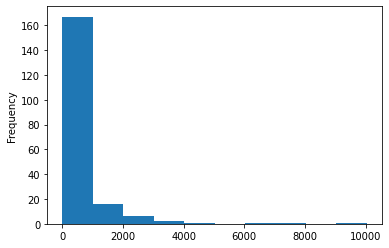

In [16]:
datos_finales.model.value_counts().plot.hist()

Calculamos la desviación típica de los datos sin estandarizar centrada en 0, para aplicar el mejor tratamiento de estos.

In [17]:
datos_finales.std(axis=0)

year              2.130057
price          9756.266820
mileage       21176.423684
tax              63.404805
mpg              16.138522
engineSize        0.557058
tax(£)           58.003289
dtype: float64

Visualizo el número de vehículos que hay de cada modelo, y veo que hay 195 modelos distintos.

In [18]:
datos_finales['model'].value_counts() 

 Focus      10042
 C Class     7646
 Fiesta      6557
 Golf        4863
 Corsa       3441
            ...  
 A2             1
 Accent         1
 Amica          1
220             1
180             1
Name: model, Length: 195, dtype: int64

Consideramos que la columna de los modelos de los coches(model) es de importancia para nuestro modelo, hemos decidido quedarnos con los modelos que aparezcan más de 2.000 veces, los vamos a llamar modelos_populares.

In [19]:
modelos_populares = datos_finales['model'].value_counts()[(datos_finales['model'].value_counts() > 2000)]

In [20]:
modelos_populares


 Focus       10042
 C Class      7646
 Fiesta       6557
 Golf         4863
 Corsa        3441
 Polo         3287
 Astra        2805
 A Class      2561
 3 Series     2443
 Kuga         2225
 Mokka X      2127
 Yaris        2122
Name: model, dtype: int64

Vemos cuantos modelos populares hay, además añadimos un nuevo tipo al que llamamos other, en el que ponemos el resto de modelos que tenemos. 

In [21]:
modelos_populares.count() 

12

In [22]:
datos_finales['model'] = datos_finales['model'].map(lambda x: x if x in modelos_populares else 'Other')

Adaptamos y transformamos nuestro conjunto de datos, modificándolos de manera oportuna para entrenar nuestro algoritmo de forma óptima. Lo primero que debemos hacer es importar el módulo "compose" de sklearn y numpy.

**1.** Borramos las columnas (drop) que no tengan todos en común, de forma que, al juntar todos los dataframes en una única tabla, dicha tabla me aparezca con sólo lo común.

**2.** Aplicamos el passthrough para que nos deje las demás columnas iguales sin modificar nada.

**3.** Aplicamos estadarización StandardScaler para los datos que nos daban desviación típica grande (más de dos cifras).

**4.** Aplicamos escalado MinMaxScaler para los datos que nos daban desviación típica pequeña (sólo una cifra).

**5.** Aplicamos OneHotEncoder para los datos no-numéricos. Por ejemplo, en la columna "maker" me aparecerá un 1 en el caso de que sea el maker y un 0 en caso contrario.

A la columna año le vamos a aplicar una transformación distinta , le vamos a restar a todos los valores el valor mas bajo.

In [23]:
datos_finales.year = datos_finales.year.map(lambda x: min(x, 2020))
datos_finales.year = datos_finales.year - datos_finales.year.min()


Importamos las librerías numpy y sklear.compose para poder utilizar el objeto compose.ColumTransformer, lo que nos va a permitir hacer una transformación de datos tanto discretos como contínuos. 


In [24]:
import sklearn.compose 
import numpy as np

# Antes de transformar las columnas, debo ver cuáles de ellas me importan de verdad y cuáles no.

column_transformer = sklearn.compose.ColumnTransformer(transformers=[
    ("one-hot0", sklearn.preprocessing.OneHotEncoder(), [0]), 
    ("passthrough", 'passthrough', [1]),
    #("passthrough2", 'passthrough', [2]),
    ("scale2", sklearn.preprocessing.StandardScaler(), [2]), #No hay que borrar el target no?
    ("one-hot3", sklearn.preprocessing.OneHotEncoder(), [3]),
    ("scale4", sklearn.preprocessing.StandardScaler(), [4]),
    ("one-hot5", sklearn.preprocessing.OneHotEncoder(), [5]),
    ("drop6", "drop", [6]),
    ("drop7", "drop", [7]),
    ("min-max8", sklearn.preprocessing.MinMaxScaler(), [8]),
    ("one-hot9", sklearn.preprocessing.OneHotEncoder(), [9]), 
    ("drop10", "drop", [10])]);

X_transform = column_transformer.fit_transform(datos_finales)

Como el proceso anterior nos devuelve un objeto de Numpy ahora lo transformamos otra vez a un DataFrame de Pandas y lo mostramos:

In [25]:
definitivo = pd.DataFrame(data= X_transform.todense(), index=None, columns=['model1','model2','model3','model4','model5','model6','model7','model8',
                                                                  'model9','model10','model11','model12','model13','year','price', 
                                                                  'transmission1','transmission2','transmission3','transmission4',
                                                                  'mileage','fuelType1','fuelType2','fuelType3','fuelType4', 'fuelType5',
                                                                  'engineSize','maker1','maker2','maker3','maker4','maker5','maker6','maker7',
                                                                  'maker8','maker9','maker10','maker11'])
columns=['model1','model2','model3','model4','model5','model6','model7','model8','model9','model10','model11','model12',
         'model13','year','transmission1','transmission2','transmission3','transmission4','mileage','fuelType1','fuelType2','fuelType3',
         'fuelType4', 'fuelType5','engineSize','maker1','maker2','maker3','maker4','maker5','maker6','maker7','maker8','maker9','maker10',
         'maker11']

In [26]:
definitivo

,model1,model2,model3,model4,model5,model6,model7,model8,model9,model10,model11,model12,model13,year,price,transmission1,transmission2,transmission3,transmission4,mileage,fuelType1,fuelType2,fuelType3,fuelType4,fuelType5,engineSize,maker1,maker2,maker3,maker4,maker5,maker6,maker7,maker8,maker9,maker10,maker11
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,47.0,-0.449982,0.0,1.0,0.0,0.0,-0.344296,0.0,0.0,0.0,0.0,1.0,0.212121,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,46.0,-0.039987,1.0,0.0,0.0,0.0,0.622255,1.0,0.0,0.0,0.0,0.0,0.303030,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,46.0,-0.603730,0.0,1.0,0.0,0.0,0.326783,0.0,0.0,0.0,0.0,1.0,0.212121,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,47.0,-0.009238,1.0,0.0,0.0,0.0,0.138177,1.0,0.0,0.0,0.0,0.0,0.303030,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,49.0,0.042012,0.0,1.0,0.0,0.0,-0.992992,0.0,0.0,0.0,0.0,1.0,0.151515,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
108535,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,42.0,-1.117248,0.0,1.0,0.0,0.0,2.407125,1.0,0.0,0.0,0.0,0.0,0.303030,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
108536,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,38.0,-1.546821,0.0,1.0,0.0,0.0,3.073058,0.0,0.0,0.0,0.0,1.0,0.181818,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
108537,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,39.0,-1.568243,0.0,1.0,0.0,0.0,2.218235,0.0,0.0,0.0,0.0,1.0,0.212121,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
108538,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,36.0,-1.603092,0.0,1.0,0.0,0.0,2.818150,0.0,0.0,0.0,0.0,1.0,0.181818,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


También me interesa obtener una descripción de los datos.

In [27]:
definitivo.describe()

,model1,model2,model3,model4,model5,model6,model7,model8,model9,model10,model11,model12,model13,year,price,transmission1,transmission2,transmission3,transmission4,mileage,fuelType1,fuelType2,fuelType3,fuelType4,fuelType5,engineSize,maker1,maker2,maker3,maker4,maker5,maker6,maker7,maker8,maker9,maker10,maker11
count,108540.000000,108540.000000,108540.000000,108540.000000,108540.000000,108540.000000,108540.000000,108540.000000,108540.000000,108540.000000,108540.000000,108540.00000,108540.000000,108540.000000,1.085400e+05,108540.000000,108540.000000,108540.000000,108540.000000,1.085400e+05,108540.000000,108540.000000,108540.000000,108540.000000,108540.000000,108540.000000,108540.000000,108540.000000,108540.000000,108540.000000,108540.000000,108540.000000,108540.000000,108540.000000,108540.000000,108540.000000,108540.000000
mean,0.022508,0.023595,0.025843,0.070444,0.031703,0.060411,0.092519,0.044804,0.020499,0.019596,0.030284,0.01955,0.538244,47.097660,-5.865811e-16,0.205629,0.564842,0.000092,0.229436,7.333568e-17,0.416224,0.000055,0.029749,0.002331,0.551640,0.251764,0.098286,0.099327,0.035922,0.050249,0.165515,0.044776,0.120868,0.057739,0.062078,0.125594,0.139644
std,0.148329,0.151784,0.158668,0.255895,0.175208,0.238248,0.289758,0.206874,0.141702,0.138610,0.171368,0.13845,0.498538,2.126091,1.000005e+00,0.404163,0.495780,0.009598,0.420472,1.000005e+00,0.492934,0.007435,0.169896,0.048224,0.497328,0.084403,0.297703,0.299103,0.186097,0.218459,0.371646,0.206813,0.325975,0.233250,0.241299,0.331393,0.346619
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,-1.685091e+00,0.000000,0.000000,0.000000,0.000000,-1.087296e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,46.000000,-6.827053e-01,0.000000,0.000000,0.000000,0.000000,-7.335634e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.181818,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,1.000000,47.000000,-2.246899e-01,0.000000,1.000000,0.000000,0.000000,-2.720457e-01,0.000000,0.000000,0.000000,0.000000,1.000000,0.242424,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,1.000000,49.000000,4.151070e-01,0.000000,1.000000,0.000000,0.000000,4.349230e-01,1.000000,0.000000,0.000000,0.000000,1.000000,0.303030,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,50.000000,1.466847e+01,1.000000,1.000000,1.000000,1.000000,1.416554e+01,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Observamos que nuestra variable objetivo (el precio/ price) no seguía una distribución normal, probamos a aplicarle un logaritmo a estos datos, ya que parecia que seguía una distribución exponencial y creíamos que así nuestro modelo mejoraría las predicciones.

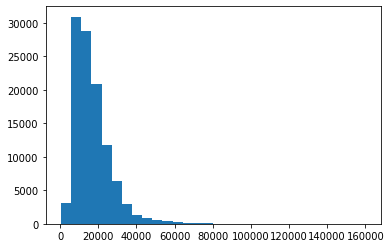

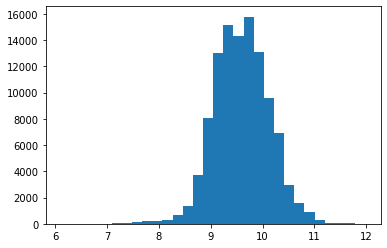

In [28]:
import matplotlib.pyplot as plt
plt.hist(datos_finales.price, bins=30)
plt.show()
plt.hist(np.log(datos_finales.price), bins=30)
plt.show()

 Nos dimos cuenta de que nuestro modelo no mejoraba aunque se parecía mas a una distribución normal y decidimos descartar este paso.

In [29]:
#definitivo['price'] = np.log(definitivo['price'].astype(float))

Seaborn es una librería para la creación de gráfica, con la que se complementará a Matplotlib

Como el objetivo del estudio es predecir el precio de los coches, el análisis de cada variable se hace también en relación a la variable precio (la que quiero predecir).

Analizando los datos de esta forma, se pueden empezar a extraer ideas sobre qué variables están más relacionadas con el precio y de qué forma.

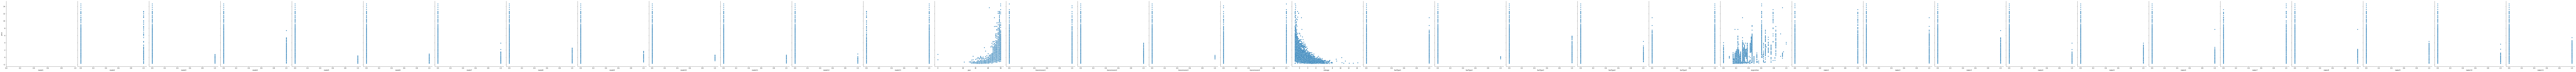

In [30]:
import seaborn as sns
from sklearn.linear_model import LinearRegression

sns.pairplot(definitivo, x_vars=['model1','model2','model3','model4','model5','model6','model7','model8',
                                'model9','model10','model11','model12','model13','year', 'transmission1',
                                 'transmission2','transmission3','transmission4','mileage','fuelType1','fuelType2',
                                 'fuelType3','fuelType4', 'fuelType5','engineSize','maker1','maker2','maker3','maker4',
                                 'maker5','maker6','maker7','maker8','maker9','maker10','maker11'], 
                                  y_vars='price', height=7)


Procedemos a interpretar las gráficas:

- Modelo: Al ser texto, nos será difícil mostrar su gráfica, por lo que lo tendríamos que pasar primero a números. (Sólo funcionan con variables continuas)
- Year: Puedo observar que el precio de los coches sube a medida que el año aumenta, por lo que nos dice que un coche cuanto más        reciente sea, más caro va a ser. Vemos que esta variable es IMPORTANTE para deducir el precio del coche.
- Transmisión, Maker: Al ser una variable discreta no la puedo interpretar
- Kilometraje: Cuantos menos km tiene el coche, mayor es su precio.
- EngineSize: Es una variable definida a trozos, 

Lo que hay que hacer es que para las variables discretas, calcular el precio medio para cada una de las variables discretas que tenemos y si vemos que todos los precios medios son mas o menos iguales, (precio medio de audi es igual que bmw,peugeot, etc), como son todos mas o menos iguales diríamos que esta variable parece que no influye mucho, pero si vemos variaciones en el precio, si que puede influir que el manufacturer tenga que ver con el precio del vehículo.


# **Entrenamiento**


En este apartado vamos a entrenar un modelo de regresión para predecir el precio de un coche en función de las variables de nuestro conjunto de datos, para esto importamos la librería sklearn.model_selection.

Tenemos que implementar un aprendizaje supervisado, por lo que vamos a dividir los datos en train y test.





Hemos implementado astype(float) porque hemos tenido problemas al ejecutar nuestro dataframe antes de decidir el tipo de preprocesamiento que aplicabamos al modelo(columna model) teníamos datos de tipo string. Nos hemos dado cuenta de que esto mejora mi algoritmo de machine learning.

In [31]:
from sklearn.model_selection import train_test_split

X, y = definitivo[columns], definitivo.price
X = X.astype(float)
y = y.astype(float)
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1337)

Hemos creado una funcion llamada train_and_evaluate a la que le vamos a pasar un modelo de regresión como argumento.

Hemos considerado relevante reescalar los datos para obtener el margen de error de precio de nuestro modelo, habría que haber aplicado la función exponencial de numpy a las variables y_pred_rescaled y y_test_rescaled para reescalarlas en el caso de haber aplicado el logaritmo a la variable objetivo.

En dicha función vamos a mostrar por pantalla el MAE, MSE, RMSE y R2, de tal forma que los podremos comparar más adelante e interpretar.

In [32]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

def train_and_evaluate(model):
  model.fit(x_train, y_train)
  y_pred = model.predict(x_test)

  print("Modelo:", repr(model))
  print("MAE: ", mean_absolute_error(y_test, y_pred))
  print("MSE: ", mean_squared_error(y_test, y_pred))
  print("RMSE: ", mean_squared_error(y_test, y_pred, squared=False))
  print("R2: ", r2_score(y_test,y_pred))

  y_pred_rescaled = column_transformer.transformers_[2][1].inverse_transform(y_pred) 
  y_test_rescaled = column_transformer.transformers_[2][1].inverse_transform(y_test)

  #y_pred_rescaled = np.exp(y_pred)
  #y_test_rescaled = np.exp(y_test) Vemos que con el logaritmo me sale peor

  print('Valores reescalados')
  print("MAE: ", mean_absolute_error(y_test_rescaled, y_pred_rescaled))
  print("MSE: ", mean_squared_error(y_test_rescaled, y_pred_rescaled))
  print("RMSE: ", mean_squared_error(y_test_rescaled, y_pred_rescaled, squared=False))
  print("R2: ", r2_score(y_test_rescaled, y_pred_rescaled))


## **Entrenamiento y Validación de Regresión Lineal**

Realizamos el entrenamiento con la funcion creada anteriormente para la regresión lineal.





In [33]:
from sklearn import linear_model
train_and_evaluate(linear_model.LinearRegression())

Modelo: LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)
MAE:  0.3011967436320925
MSE:  0.23289097007354834
RMSE:  0.48258778483665365
R2:  0.7638821373291764
Valores reescalados
MAE:  2938.5422594160245
MSE:  22167462.726817477
RMSE:  4708.2335038544425
R2:  0.7638821373291764


Visualizamos que los tipos de datos sigan estando bien

In [34]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 86832 entries, 33912 to 3223
Data columns (total 36 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   model1         86832 non-null  float64
 1   model2         86832 non-null  float64
 2   model3         86832 non-null  float64
 3   model4         86832 non-null  float64
 4   model5         86832 non-null  float64
 5   model6         86832 non-null  float64
 6   model7         86832 non-null  float64
 7   model8         86832 non-null  float64
 8   model9         86832 non-null  float64
 9   model10        86832 non-null  float64
 10  model11        86832 non-null  float64
 11  model12        86832 non-null  float64
 12  model13        86832 non-null  float64
 13  year           86832 non-null  float64
 14  transmission1  86832 non-null  float64
 15  transmission2  86832 non-null  float64
 16  transmission3  86832 non-null  float64
 17  transmission4  86832 non-null  float64
 18  mil

## **Entrenamiento y Validación de Ridge**

Realizamos el entrenamiento con la funcion creada anteriormente para Ridge.

In [35]:
from sklearn import linear_model
train_and_evaluate(linear_model.Ridge())

Modelo: Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)
MAE:  0.3011340244551018
MSE:  0.23289856158364633
RMSE:  0.4825956501913857
R2:  0.7638744406325712
Valores reescalados
MAE:  2937.930357209379
MSE:  22168185.316092122
RMSE:  4708.310240000346
R2:  0.7638744406325712


In [36]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 86832 entries, 33912 to 3223
Data columns (total 36 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   model1         86832 non-null  float64
 1   model2         86832 non-null  float64
 2   model3         86832 non-null  float64
 3   model4         86832 non-null  float64
 4   model5         86832 non-null  float64
 5   model6         86832 non-null  float64
 6   model7         86832 non-null  float64
 7   model8         86832 non-null  float64
 8   model9         86832 non-null  float64
 9   model10        86832 non-null  float64
 10  model11        86832 non-null  float64
 11  model12        86832 non-null  float64
 12  model13        86832 non-null  float64
 13  year           86832 non-null  float64
 14  transmission1  86832 non-null  float64
 15  transmission2  86832 non-null  float64
 16  transmission3  86832 non-null  float64
 17  transmission4  86832 non-null  float64
 18  mil

## **Entrenamiento y Validación de Lasso**

Realizamos el entrenamiento con la funcion creada anteriormente para lasso.

In [37]:
from sklearn import linear_model
train_and_evaluate(linear_model.Lasso())

Modelo: Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)
MAE:  0.7049567998681152
MSE:  0.9575953860211005
RMSE:  0.9785680283051866
R2:  0.029136356041030598
Valores reescalados
MAE:  6877.71495300595
MSE:  91147630.24213167
RMSE:  9547.126805596105
R2:  0.029136356041030598


Visualizamos que los datos sigan estando bien.

In [38]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 86832 entries, 33912 to 3223
Data columns (total 36 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   model1         86832 non-null  float64
 1   model2         86832 non-null  float64
 2   model3         86832 non-null  float64
 3   model4         86832 non-null  float64
 4   model5         86832 non-null  float64
 5   model6         86832 non-null  float64
 6   model7         86832 non-null  float64
 7   model8         86832 non-null  float64
 8   model9         86832 non-null  float64
 9   model10        86832 non-null  float64
 10  model11        86832 non-null  float64
 11  model12        86832 non-null  float64
 12  model13        86832 non-null  float64
 13  year           86832 non-null  float64
 14  transmission1  86832 non-null  float64
 15  transmission2  86832 non-null  float64
 16  transmission3  86832 non-null  float64
 17  transmission4  86832 non-null  float64
 18  mil

## **Entrenamiento y Validación de ElasticNet**

Realizamos el entrenamiento con la funcion creada anteriormente para ElasticNet.

In [39]:
from sklearn import linear_model
train_and_evaluate(linear_model.ElasticNet())

Modelo: ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0.5,
           max_iter=1000, normalize=False, positive=False, precompute=False,
           random_state=None, selection='cyclic', tol=0.0001, warm_start=False)
MAE:  0.6345448634780682
MSE:  0.8100655974791666
RMSE:  0.9000364423061805
R2:  0.1787102890269212
Valores reescalados
MAE:  6190.760478816142
MSE:  77105174.72070985
RMSE:  8780.955228260184
R2:  0.1787102890269212


In [40]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 86832 entries, 33912 to 3223
Data columns (total 36 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   model1         86832 non-null  float64
 1   model2         86832 non-null  float64
 2   model3         86832 non-null  float64
 3   model4         86832 non-null  float64
 4   model5         86832 non-null  float64
 5   model6         86832 non-null  float64
 6   model7         86832 non-null  float64
 7   model8         86832 non-null  float64
 8   model9         86832 non-null  float64
 9   model10        86832 non-null  float64
 10  model11        86832 non-null  float64
 11  model12        86832 non-null  float64
 12  model13        86832 non-null  float64
 13  year           86832 non-null  float64
 14  transmission1  86832 non-null  float64
 15  transmission2  86832 non-null  float64
 16  transmission3  86832 non-null  float64
 17  transmission4  86832 non-null  float64
 18  mil

# **Validación cruzada y optimización con Grid search**

Vamos a utilizar validación cruzada(cross-validation) con 5 folds que consiste en dividir el conjunto de datos en subconjuntos e ir seleccionando una partición diferente cada vez para validar nuestro modelo y entrenarlo con las 4 restantes, las cuales componen el conjunto de datos de entrenamiento de nuestro algoritmo.

Hemos importado la librería sklearn.model_selection para optimizar con GridSeach los hiperparámetros para cada uno de nuestros modelos de regresión, al hacer esto vamos a entrenar el modelo con todas las combinaciones de los hiperparámetros.

In [41]:
from sklearn.model_selection import GridSearchCV

## **Utilizando Regresión Lineal**

Para esta parte, hemos utilizado la página de [Regresión Lineal](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) para saber que parámetros admite el modelo y optimizarlos con GridSearch.
Los parámetros que hemos elegido son "fit_intercept" y "normalize".

Hemos implementado también la validación cruzada con 5 folds de nuestro modelo entrenado, utilizando las siguientes métricas de calidad: RMSE, MAE y R2.


In [42]:
params = {'fit_intercept': [True, False],
          'normalize': [True, False]}

model = linear_model.LinearRegression()

clf_lr = GridSearchCV(model,
                   params,
                   scoring=['r2', 'neg_mean_absolute_error', 'neg_root_mean_squared_error'],
                   refit=False,
                   cv=5)
clf_lr.fit(x_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=LinearRegression(copy_X=True, fit_intercept=True,
                                        n_jobs=None, normalize=False),
             iid='deprecated', n_jobs=None,
             param_grid={'fit_intercept': [True, False],
                         'normalize': [True, False]},
             pre_dispatch='2*n_jobs', refit=False, return_train_score=False,
             scoring=['r2', 'neg_mean_absolute_error',
                      'neg_root_mean_squared_error'],
             verbose=0)

Para cada una de las métricas de calidad, nos aparecen 4 valores debido a que son las posibles combinaciones que tenemos usando los parámetros elegidos a optimizar para este modelo.

mean_test_neg_mean_absolute_error: array([-0.30076126, -0.30081218, -0.30070454, -0.30070454])

mean_test_neg_root_mean_squared_error: array([-0.4781011 , -0.47814487, -0.47811341, -0.47811341])

mean_test_r2: array([0.77216654, 0.77212462, 0.77215461, 0.77215461])

Al ver los resultados, obtenemos el ranking que nos muestra la posición en la que obtenemos un mejor resultado para cada una de las métricas de calidad:

rank_test_neg_mean_absolute_error: array([3, 4, 1, 1], dtype=int32)

rank_test_neg_root_mean_squared_error: array([1, 4, 2, 2], dtype=int32)

rank_test_r2: array([1, 4, 2, 2], dtype=int32)

In [43]:
clf_lr.cv_results_

{'mean_fit_time': array([0.12357221, 0.11342845, 0.11125007, 0.10602403]),
 'mean_score_time': array([0.00424275, 0.00447483, 0.00407538, 0.00424232]),
 'mean_test_neg_mean_absolute_error': array([-0.30076126, -0.30081218, -0.30070454, -0.30070454]),
 'mean_test_neg_root_mean_squared_error': array([-0.4781011 , -0.47814487, -0.47811341, -0.47811341]),
 'mean_test_r2': array([0.77216654, 0.77212462, 0.77215461, 0.77215461]),
 'param_fit_intercept': masked_array(data=[True, True, False, False],
              mask=[False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_normalize': masked_array(data=[True, False, True, False],
              mask=[False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'fit_intercept': True, 'normalize': True},
  {'fit_intercept': True, 'normalize': False},
  {'fit_intercept': False, 'normalize': True},
  {'fit_intercept': False, 'normalize': False}],
 'rank_test_neg_mean_absolute_error

Ahora, voy a ver el mejor resultado para cada uno de los 5 folds al aplicar la validación cruzada para cada una de las métricas de calidad.

In [44]:
for i in range(5):
  print(clf_lr.cv_results_[f'split{i}_test_r2'][2])

0.771354940054218
0.7715729117341223
0.7742856276445326
0.7697556814092322
0.773803883707413


In [45]:
for i in range(5):
  print(clf_lr.cv_results_[f'split{i}_test_neg_root_mean_squared_error'][2])

-0.4741088158632826
-0.4774710315412631
-0.47420031985801575
-0.48160258365409603
-0.4831843093175569


In [46]:
for i in range(5):
  print(clf_lr.cv_results_[f'split{i}_test_neg_mean_absolute_error'][2])

-0.29802658805028787
-0.30089300717880657
-0.2993193462642556
-0.29955074234943646
-0.3057330092058963


De esta forma, se podría mostrar gráficamente para cada una de las métricas de calidad, el resultado al hacer las posibles combinaciones explicadas anteriormente. Como podemos ver en la gráfica la diferencia es casi despreciable a simple vista, por lo que sólo pintamos las gráficas para el r2.

<BarContainer object of 4 artists>

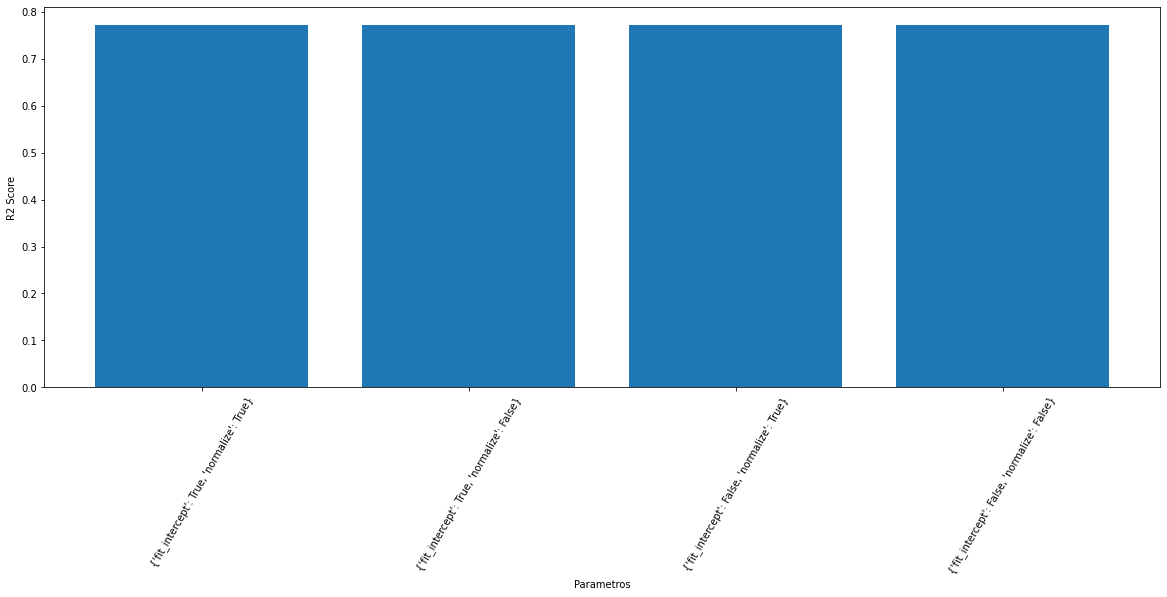

In [47]:
plt.figure(figsize=(20, 7))
plt.ylabel('R2 Score')
plt.xlabel('Parametros')
plt.xticks(range(len(clf_lr.cv_results_['params'])), clf_lr.cv_results_['params'], rotation=60)
plt.bar(range(len(clf_lr.cv_results_['params'])), clf_lr.cv_results_['mean_test_r2'])


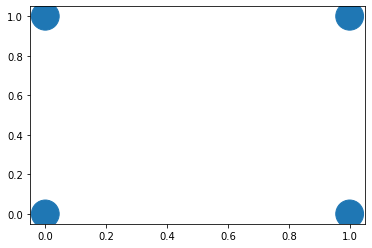

In [48]:
plt.scatter(clf_lr.cv_results_['param_fit_intercept'].data,
            clf_lr.cv_results_['param_normalize'].data,
            s = clf_lr.cv_results_['mean_test_r2']*1000)

## **Utilizando Ridge**

Para esta parte, hemos utilizado la página de [Ridge](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html) para saber que parámetros admite el modelo y optimizarlos con GridSearch.
Los parámetros que hemos elegido son "alpha" y "fit_intercept".

Hemos implementado también la validación cruzada con 5 folds de nuestro modelo entrenado, utilizando las siguientes métricas de calidad: RMSE, MAE y R2.


In [49]:
params = {'alpha': [0.0001, 0.001, 0.01, 0.1, 0.5, 1],
          'fit_intercept': [True, False],
          #'solver': ['svd', 'cholesky', 'lsqr']
          }

model = linear_model.Ridge(random_state=1337)

clf_ridge = GridSearchCV(model, params,
                   scoring=['r2', 'neg_mean_absolute_error', 'neg_root_mean_squared_error'],
                   refit=False,
                   cv=5)
clf_ridge.fit(X, y)

GridSearchCV(cv=5, error_score=nan,
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=1337,
                             solver='auto', tol=0.001),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 0.5, 1],
                         'fit_intercept': [True, False]},
             pre_dispatch='2*n_jobs', refit=False, return_train_score=False,
             scoring=['r2', 'neg_mean_absolute_error',
                      'neg_root_mean_squared_error'],
             verbose=0)

Para cada una de las métricas de calidad, nos aparecen 12 valores debido a que son las posibles combinaciones que tenemos usando los parámetros elegidos a optimizar para este modelo.

mean_test_neg_mean_absolute_error: array([-0.33920757, -1.20027996, -0.33920754, -1.2002359 , -0.33920738,
        -1.19979529, -0.33920584, -1.19544469, -0.33919933, -1.17722695,
        -0.33919184, -1.15663397])

mean_test_neg_root_mean_squared_error: array([-0.5067906 , -1.43522204, -0.50679065, -1.43517094, -0.5067913 ,
        -1.43465999, -0.50679786, -1.42961464, -0.50682837, -1.40848234,
        -0.50686907, -1.38457577])

mean_test_r2: array([ 0.67622222, -2.72738359,  0.6762222 , -2.72711352,  0.67622175,
        -2.72441296,  0.67621717, -2.69777178,  0.67619508, -2.58673972,
         0.6761641 , -2.46238539])

Al ver los resultados, obtenemos el ranking que nos muestra la posición en la que obtenemos un mejor resultado para cada una de las métricas de calidad:

rank_test_neg_mean_absolute_error: array([ 6, 12,  5, 11,  4, 10,  3,  9,  2,  8,  1,  7], dtype=int32)

rank_test_neg_root_mean_squared_error: array([ 1, 12,  2, 11,  3, 10,  4,  9,  5,  8,  6,  7], dtype=int32)

rank_test_r2: array([ 1, 12,  2, 11,  3, 10,  4,  9,  5,  8,  6,  7], dtype=int32)


In [50]:
clf_ridge.cv_results_

{'mean_fit_time': array([0.05289116, 0.04818902, 0.05442681, 0.0477735 , 0.05624237,
        0.04750872, 0.05602531, 0.04779243, 0.05386658, 0.04738631,
        0.05585771, 0.04818158]),
 'mean_score_time': array([0.0046813 , 0.00450268, 0.00720773, 0.00432043, 0.00452523,
        0.00454612, 0.00437584, 0.00447512, 0.00444689, 0.004389  ,
        0.00458908, 0.00479798]),
 'mean_test_neg_mean_absolute_error': array([-0.33920757, -1.20027996, -0.33920754, -1.2002359 , -0.33920738,
        -1.19979529, -0.33920584, -1.19544469, -0.33919933, -1.17722695,
        -0.33919184, -1.15663397]),
 'mean_test_neg_root_mean_squared_error': array([-0.5067906 , -1.43522204, -0.50679065, -1.43517094, -0.5067913 ,
        -1.43465999, -0.50679786, -1.42961464, -0.50682837, -1.40848234,
        -0.50686907, -1.38457577]),
 'mean_test_r2': array([ 0.67622222, -2.72738359,  0.6762222 , -2.72711352,  0.67622175,
        -2.72441296,  0.67621717, -2.69777178,  0.67619508, -2.58673972,
         0.6761641 ,

Ahora, voy a ver el mejor resultado para cada uno de los 5 folds al aplicar la validación cruzada para cada una de las métricas de calidad.

In [51]:
for i in range(5):
  print(clf_ridge.cv_results_[f'split{i}_test_r2'][2])

0.6109371291308544
0.7694007294143395
0.7239839853253043
0.5111812048620749
0.765607949935611


In [52]:
for i in range(5):
  print(clf_ridge.cv_results_[f'split{i}_test_neg_root_mean_squared_error'][2])

-0.7373860085243161
-0.3415182439071233
-0.6242355606949357
-0.4756712512221644
-0.35514217885923993


In [53]:
for i in range(5):
  print(clf_ridge.cv_results_[f'split{i}_test_neg_mean_absolute_error'][2])

-0.4611650632077888
-0.24498486037434555
-0.38167378704421173
-0.3725843486762791
-0.23562965333236827


Mostramos gráficamente para cada una de las métricas de calidad, el resultado al hacer las posibles combinaciones explicadas anteriormente. Como podemos ver en la gráfica hay una diferencia notable, y es que cuando fit_intercept = True, tenemos un mejor resultado. Una vez seleccionados los que tienen el valor de True, a simple vista en la gráfica no los podemos diferenciar.

<BarContainer object of 12 artists>

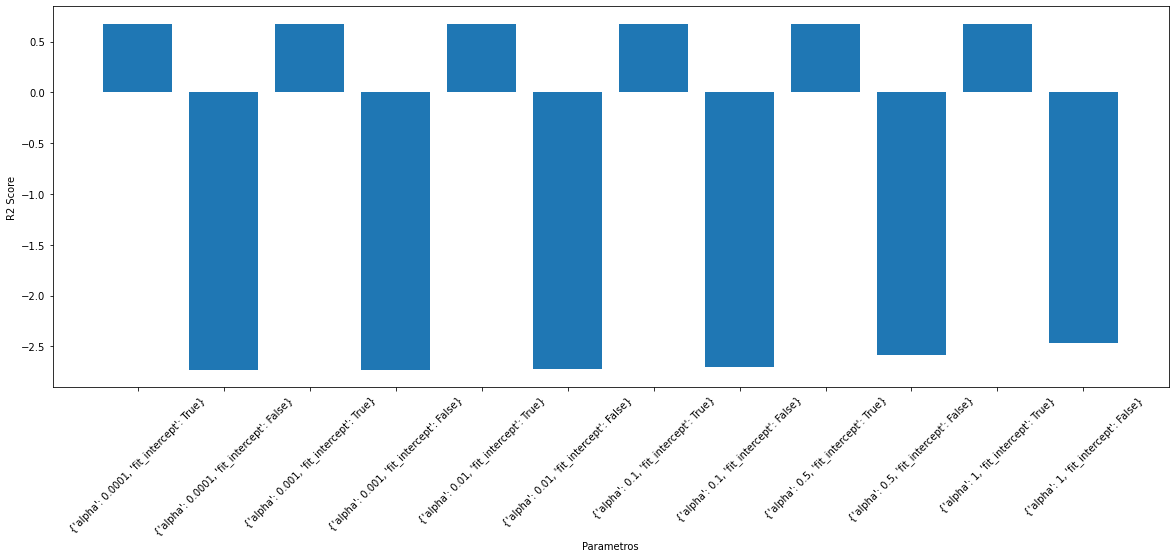

In [54]:
plt.figure(figsize=(20, 7))
plt.ylabel('R2 Score')
plt.xlabel('Parametros')
plt.xticks(range(len(clf_ridge.cv_results_['params'])), clf_ridge.cv_results_['params'], rotation=45)
plt.bar(range(len(clf_ridge.cv_results_['params'])), clf_ridge.cv_results_['mean_test_r2'])

<BarContainer object of 12 artists>

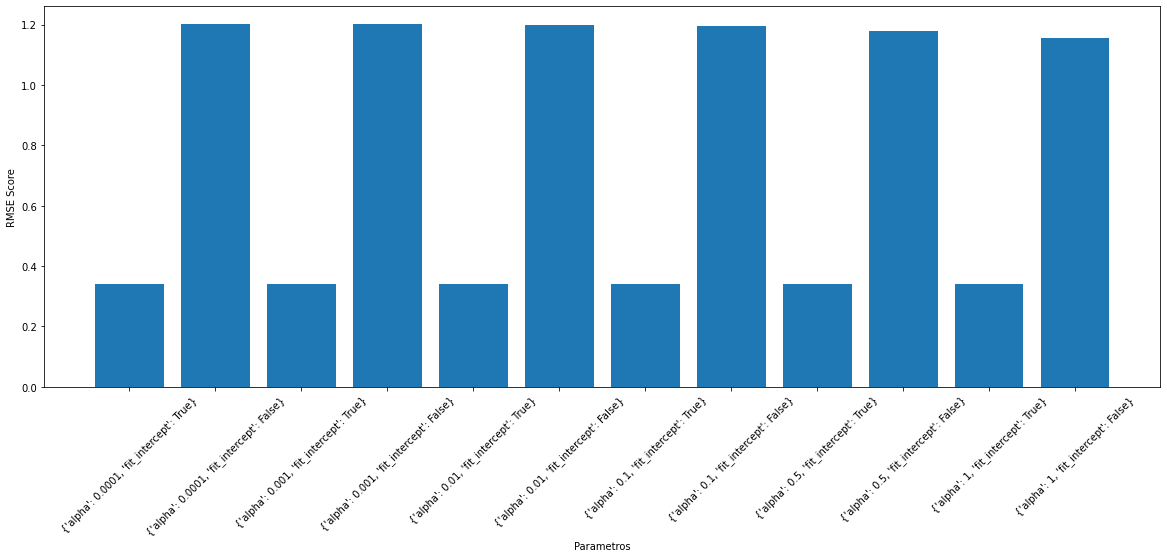

In [55]:
plt.figure(figsize=(20, 7))
plt.ylabel('RMSE Score')
plt.xlabel('Parametros')
plt.xticks(range(len(clf_ridge.cv_results_['params'])), clf_ridge.cv_results_['params'], rotation=45)
plt.bar(range(len(clf_ridge.cv_results_['params'])), list(map(lambda x: -x, clf_ridge.cv_results_['mean_test_neg_mean_absolute_error'])))


<BarContainer object of 12 artists>

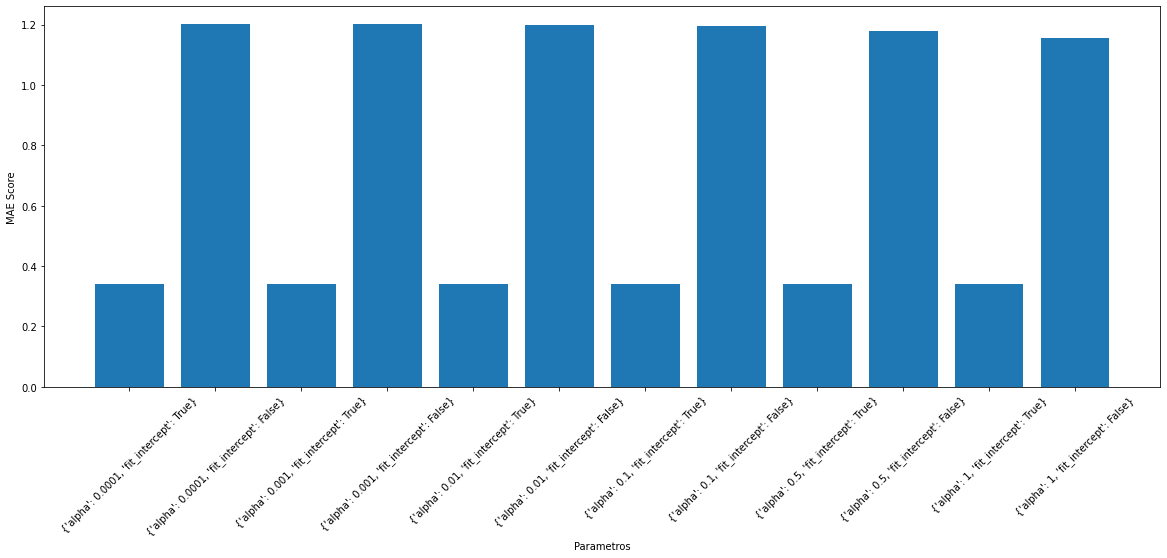

In [56]:
plt.figure(figsize=(20, 7))
plt.ylabel('MAE Score')
plt.xlabel('Parametros')
plt.xticks(range(len(clf_ridge.cv_results_['params'])), clf_ridge.cv_results_['params'], rotation=45)
plt.bar(range(len(clf_ridge.cv_results_['params'])),  list(map(lambda x: -x, clf_ridge.cv_results_['mean_test_neg_mean_absolute_error'])))


## **Utilizando Lasso**

Para esta parte, hemos utilizado la página de [Lasso](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html) para saber que parámetros admite el modelo y optimizarlos con GridSearch.
Los parámetros que hemos elegido son "alpha", "fit_intercept" y "selection".

Hemos implementado también la validación cruzada con 5 folds de nuestro modelo entrenado, utilizando las siguientes métricas de calidad: RMSE, MAE y R2.

In [57]:
params = {'alpha': [0.001, 0.01, 0.1, 0.5, 0.7],
          'fit_intercept': [True, False],
          'selection': ['cyclic', 'random']
          }

model = linear_model.Lasso(random_state=1337)

clf_lasso = GridSearchCV(model, params,
                   scoring=['r2', 'neg_mean_absolute_error', 'neg_root_mean_squared_error'],
                   refit=False,
                   cv=5)
clf_lasso.fit(X, y)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9988.316228963824, tolerance: 7.028013472263335
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 13939.05983806807, tolerance: 9.656825663382634
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 11055.327880912047, tolerance: 7.686558411254298
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 13542.36503

GridSearchCV(cv=5, error_score=nan,
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=1337,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [0.001, 0.01, 0.1, 0.5, 0.7],
                         'fit_intercept': [True, False],
                         'selection': ['cyclic', 'random']},
             pre_dispatch='2*n_jobs', refit=False, return_train_score=False,
             scoring=['r2', 'neg_mean_absolute_error',
                      'neg_root_mean_squared_error'],
             verbose=0)

Para cada una de las métricas de calidad, nos aparecen 20 valores debido a que son las posibles combinaciones que tenemos usando los parámetros elegidos a optimizar para este modelo.

mean_test_neg_mean_absolute_error: array([-0.34854171, -0.3494773 , -0.39331487, -0.41629459, -0.36156858,
        -0.36157362, -0.42718925, -0.42726974, -0.52103588, -0.52117213,
        -0.54756234, -0.54764068, -0.67357158, -0.67357158, -0.75566789,
        -0.75566789, -0.69989576, -0.69989576, -0.75397773, -0.75397773])

mean_test_neg_root_mean_squared_error: array([-0.52003598, -0.52064347, -0.55893874, -0.58152624, -0.55069785,
        -0.5507026 , -0.61973947, -0.61989132, -0.75479179, -0.75491711,
        -0.78344577, -0.78352622, -0.9114873 , -0.9114873 , -1.00306784,
        -1.00306784, -0.93815331, -0.93815331, -1.0013798 , -1.0013798 ])

mean_test_r2: array([ 0.66235738,  0.66180642,  0.58651693,  0.5403309 ,  0.62853318, 0.62853087,  0.52416239,  0.52393496,  0.28744279,  0.2872297 ,
         0.2295434 ,  0.22941662, -0.04040425, -0.04040425, -0.27115331,
        -0.27115331, -0.09806057, -0.09806057, -0.26639206, -0.26639206])

Al ver los resultados, obtenemos el ranking que nos muestra la posición en la que obtenemos un mejor resultado para cada una de las métricas de calidad:

rank_test_neg_mean_absolute_error: array([ 1,  2,  5,  6,  3,  4,  7,  8,  9, 10, 11, 12, 13, 13, 19, 19, 15,
        15, 17, 17], dtype=int32)

rank_test_neg_root_mean_squared_error: array([1,  2,  5,  6,  3,  4,  7,  8,  9, 10, 11, 12, 13, 13, 19, 19, 15,
        15, 17, 17], dtype=int32)

rank_test_r2: array([1,  2,  5,  6,  3,  4,  7,  8,  9, 10, 11, 12, 13, 13, 19, 19, 15, 15, 17, 17], dtype=int32)



In [58]:
clf_lasso.cv_results_

{'mean_fit_time': array([0.38887625, 0.87425938, 5.59961615, 6.15416441, 0.10925121,
        0.17736931, 0.87803345, 1.24758592, 0.06473475, 0.0929059 ,
        0.12566423, 0.14165068, 0.0540091 , 0.05202508, 0.04577341,
        0.04906735, 0.05430393, 0.05413594, 0.04684372, 0.04986587]),
 'mean_score_time': array([0.00454159, 0.00445733, 0.00447378, 0.00601077, 0.0045064 ,
        0.00457745, 0.00507889, 0.03492417, 0.00484896, 0.0046277 ,
        0.00512815, 0.0046567 , 0.0045908 , 0.00472221, 0.00469656,
        0.00495658, 0.00472803, 0.00488744, 0.00464082, 0.00486431]),
 'mean_test_neg_mean_absolute_error': array([-0.34854171, -0.3494773 , -0.39331487, -0.41629459, -0.36156858,
        -0.36157362, -0.42718925, -0.42726974, -0.52103588, -0.52117213,
        -0.54756234, -0.54764068, -0.67357158, -0.67357158, -0.75566789,
        -0.75566789, -0.69989576, -0.69989576, -0.75397773, -0.75397773]),
 'mean_test_neg_root_mean_squared_error': array([-0.52003598, -0.52064347, -0.5589387

De esta forma, se podría mostrar gráficamente para cada una de las métricas de calidad, el resultado al hacer las posibles combinaciones explicadas anteriormente. 

En este caso, vemos que tanto para todas las métricas de calidad, la mejor combinación ha sido: alpha: 0.001 , fit_intercept: True , selection: cyclic

<BarContainer object of 20 artists>

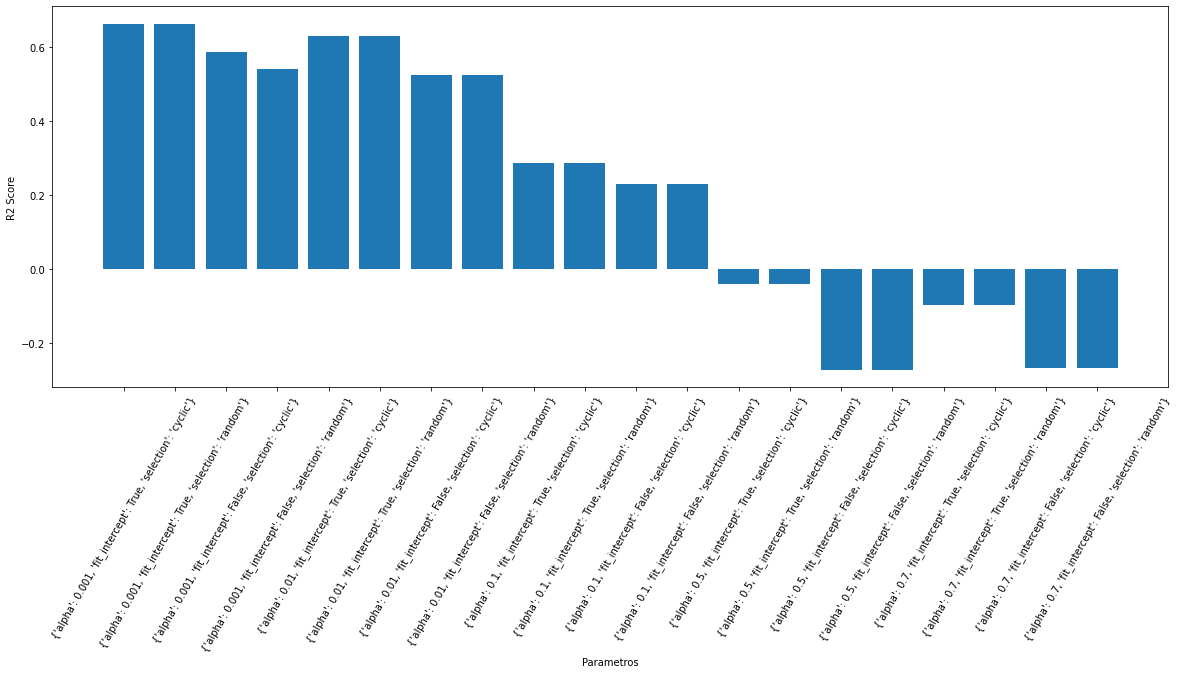

In [59]:
plt.figure(figsize=(20, 7))
plt.ylabel('R2 Score')
plt.xlabel('Parametros')
plt.xticks(range(len(clf_lasso.cv_results_['params'])), clf_lasso.cv_results_['params'], rotation=60)
plt.bar(range(len(clf_lasso.cv_results_['params'])), clf_lasso.cv_results_['mean_test_r2'])

<BarContainer object of 20 artists>

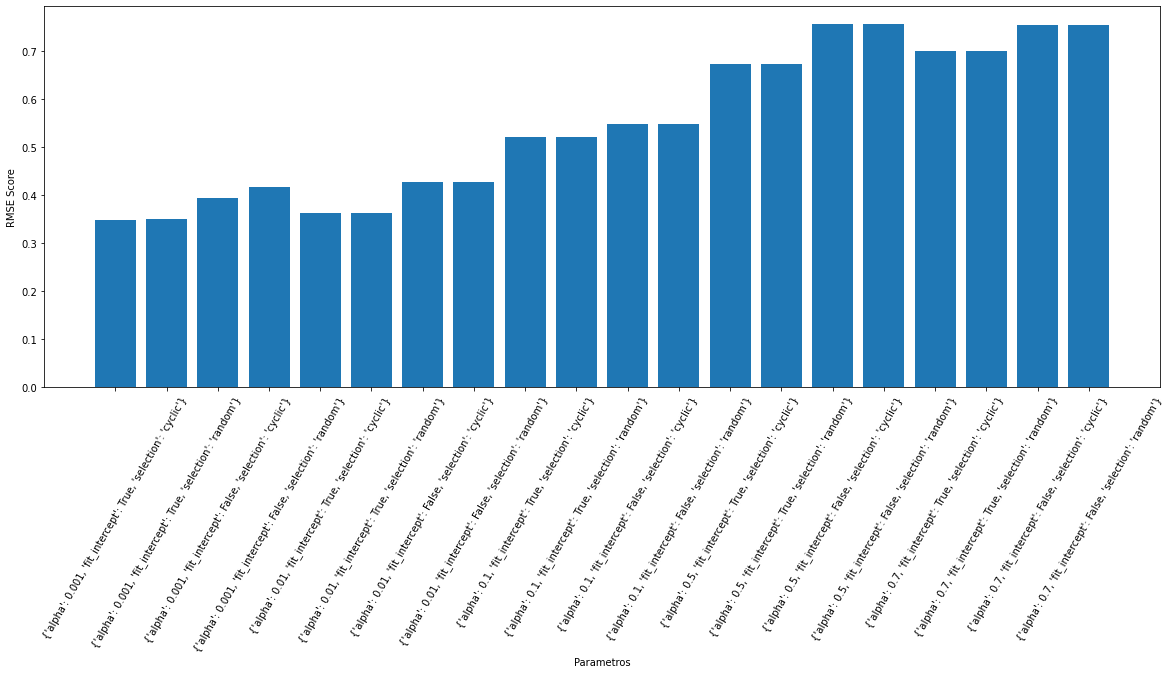

In [60]:
plt.figure(figsize=(20, 7))
plt.ylabel('RMSE Score')
plt.xlabel('Parametros')
plt.xticks(range(len(clf_lasso.cv_results_['params'])), clf_lasso.cv_results_['params'], rotation=60)
plt.bar(range(len(clf_lasso.cv_results_['params'])), list(map(lambda x: -x, clf_lasso.cv_results_['mean_test_neg_mean_absolute_error'])))

<BarContainer object of 20 artists>

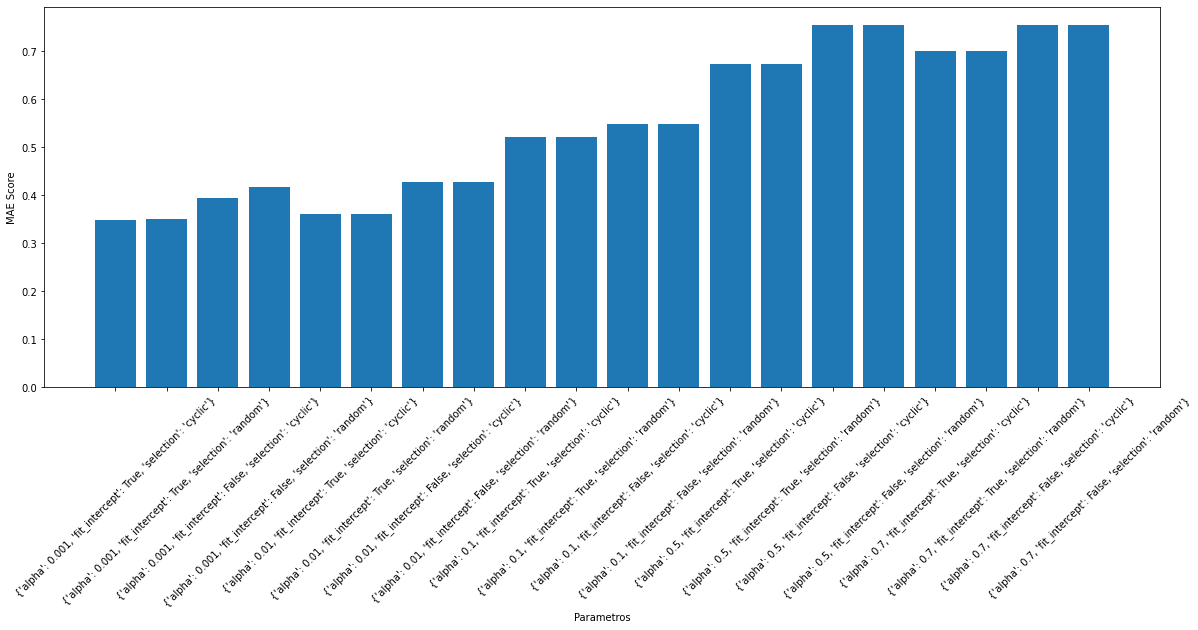

In [61]:
plt.figure(figsize=(20, 7))
plt.ylabel('MAE Score')
plt.xlabel('Parametros')
plt.xticks(range(len(clf_lasso.cv_results_['params'])), clf_lasso.cv_results_['params'], rotation=45)
plt.bar(range(len(clf_lasso.cv_results_['params'])), list(map(lambda x: -x, clf_lasso.cv_results_['mean_test_neg_mean_absolute_error'])))


## **Utilizando ElasticNet**


Para esta parte, hemos utilizado la página de [ElasticNet](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html) para saber que parámetros admite el modelo y optimizarlos con GridSearch.
Los parámetros que hemos elegido son "alpha" y "l1_ratio".

Hemos implementado también la validación cruzada con 5 folds de nuestro modelo entrenado, utilizando las siguientes métricas de calidad: RMSE, MAE y R2.

In [62]:
params = {'alpha': [0.1, 0.3, 0.5, 0.7, 0.9],
          'l1_ratio': [0.001, 0.01, 0.1]
          }

model = linear_model.ElasticNet(random_state=1337)

clf_en = GridSearchCV(model, params,
                   scoring=['r2', 'neg_mean_absolute_error', 'neg_root_mean_squared_error'],
                   refit=False,
                   cv=5)
clf_en.fit(X, y)

GridSearchCV(cv=5, error_score=nan,
             estimator=ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True,
                                  l1_ratio=0.5, max_iter=1000, normalize=False,
                                  positive=False, precompute=False,
                                  random_state=1337, selection='cyclic',
                                  tol=0.0001, warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [0.1, 0.3, 0.5, 0.7, 0.9],
                         'l1_ratio': [0.001, 0.01, 0.1]},
             pre_dispatch='2*n_jobs', refit=False, return_train_score=False,
             scoring=['r2', 'neg_mean_absolute_error',
                      'neg_root_mean_squared_error'],
             verbose=0)

Para cada una de las métricas de calidad, nos aparecen 4 valores debido a que son las posibles combinaciones que tenemos usando los parámetros elegidos a optimizar para este modelo.

mean_test_neg_mean_absolute_error: array([-0.44686423, -0.44800807, -0.45922129, -0.48245335, -0.48559284,
        -0.51395961, -0.50764609, -0.51237691, -0.55505848, -0.52684392,
        -0.53288254, -0.58366615, -0.54199238, -0.54906166, -0.60554525])

mean_test_neg_root_mean_squared_error: array([-0.68335034, -0.68476376, -0.69719157, -0.71896502, -0.72212009,
        -0.74959494, -0.74360043, -0.74825581, -0.78935545, -0.76246661,
        -0.7683908 , -0.8180746 , -0.77742491, -0.78440059, -0.84062596])

mean_test_r2: array([0.42120535, 0.41916431, 0.40077792, 0.35697326, 0.35168341,
        0.30058601, 0.31087348, 0.30253118, 0.21981229, 0.27465214,
        0.26360234, 0.16014714, 0.24539673, 0.23200528, 0.11250157])

Al ver los resultados, obtenemos el ranking que nos muestra la posición en la que obtenemos un mejor resultado para cada una de las métricas de calidad:

rank_test_neg_mean_absolute_error: array([1,  2,  3,  4,  5,  8,  6,  7, 13,  9, 10, 14, 11, 12, 15], dtype=int32)

rank_test_neg_root_mean_squared_error: array([1,  2,  3,  4,  5,  8,  6,  7, 13,  9, 10, 14, 11, 12, 15], dtype=int32)

rank_test_r2: array([1,  2,  3,  4,  5,  8,  6,  7, 13,  9, 10, 14, 11, 12, 15], dtype=int32)

In [63]:
clf_en.cv_results_

{'mean_fit_time': array([0.15286226, 0.15035095, 0.12290983, 0.11896367, 0.12522993,
        0.10690427, 0.10570354, 0.11092148, 0.09712491, 0.10844278,
        0.1032969 , 0.0956924 , 0.10843573, 0.09170938, 0.06960487]),
 'mean_score_time': array([0.00661616, 0.0064528 , 0.0053864 , 0.00470805, 0.00575233,
        0.00560799, 0.00460167, 0.00554957, 0.00547113, 0.00492058,
        0.00532694, 0.00627322, 0.00512667, 0.00478811, 0.00448723]),
 'mean_test_neg_mean_absolute_error': array([-0.44686423, -0.44800807, -0.45922129, -0.48245335, -0.48559284,
        -0.51395961, -0.50764609, -0.51237691, -0.55505848, -0.52684392,
        -0.53288254, -0.58366615, -0.54199238, -0.54906166, -0.60554525]),
 'mean_test_neg_root_mean_squared_error': array([-0.68335034, -0.68476376, -0.69719157, -0.71896502, -0.72212009,
        -0.74959494, -0.74360043, -0.74825581, -0.78935545, -0.76246661,
        -0.7683908 , -0.8180746 , -0.77742491, -0.78440059, -0.84062596]),
 'mean_test_r2': array([0.421205

Ahora, voy a ver el mejor resultado para cada uno de los 5 folds al aplicar la validación cruzada para cada una de las métricas de calidad.

In [64]:
for i in range(5):
  print(clf_en.cv_results_[f'split{i}_test_r2'][2])

0.18848543409103957
0.5561382531280535
0.4505499115138909
0.19551918659379208
0.6131968043628198


In [65]:
for i in range(5):
  print(clf_en.cv_results_[f'split{i}_test_neg_root_mean_squared_error'][2])

-1.064959664234777
-0.47381499736956906
-0.8807354733695278
-0.6102261316556425
-0.45622159948333235


In [66]:
for i in range(5):
  print(clf_en.cv_results_[f'split{i}_test_neg_mean_absolute_error'][2])

-0.6462037326645316
-0.3303702063231898
-0.49459956255839344
-0.4945074178556059
-0.3304255423285714


De esta forma, se podría mostrar gráficamente para cada una de las métricas de calidad, el resultado al hacer las posibles combinaciones explicadas anteriormente. 

En este caso, vemos que tanto para todas las métricas de calidad, la mejor combinación ha sido: alpha: 0.1 y l1_ratio: 0.001

<BarContainer object of 15 artists>

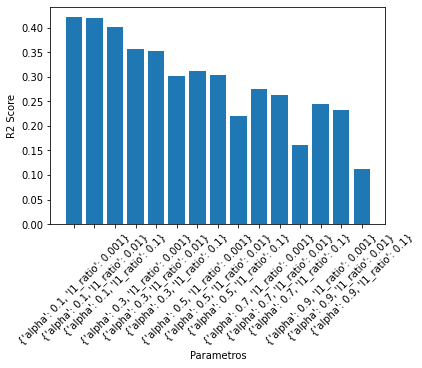

In [67]:
plt.ylabel('R2 Score')
plt.xlabel('Parametros')
plt.xticks(range(len(clf_en.cv_results_['params'])), clf_en.cv_results_['params'], rotation=45)
plt.bar(range(len(clf_en.cv_results_['params'])), clf_en.cv_results_['mean_test_r2'])

<BarContainer object of 15 artists>

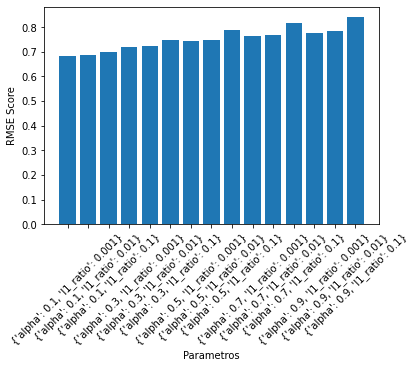

In [68]:
plt.ylabel('RMSE Score')
plt.xlabel('Parametros')
plt.xticks(range(len(clf_en.cv_results_['params'])), clf_en.cv_results_['params'], rotation=45)
plt.bar(range(len(clf_en.cv_results_['params'])),
        list(map(lambda x: -x, clf_en.cv_results_['mean_test_neg_root_mean_squared_error'])))

<BarContainer object of 15 artists>

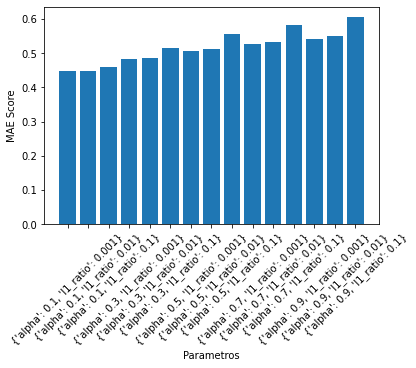

In [69]:
plt.ylabel('MAE Score')
plt.xlabel('Parametros')
plt.xticks(range(len(clf_en.cv_results_['params'])), clf_en.cv_results_['params'], rotation=45)
plt.bar(range(len(clf_en.cv_results_['params'])),
        list(map(lambda x: -x, clf_en.cv_results_['mean_test_neg_mean_absolute_error'])))

In [70]:
best_params = {'alpha': 0.1, 'l1_ratio': 0.001}
model = linear_model.ElasticNet(**best_params)
model.fit(X, y)

ElasticNet(alpha=0.1, copy_X=True, fit_intercept=True, l1_ratio=0.001,
           max_iter=1000, normalize=False, positive=False, precompute=False,
           random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

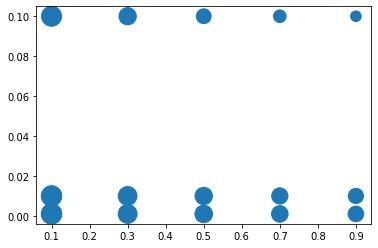

In [71]:
plt.scatter(clf_en.cv_results_['param_alpha'].data,
            clf_en.cv_results_['param_l1_ratio'].data,
            s = clf_en.cv_results_['mean_test_r2']*1000)

## **CONCLUSIÓN FINAL**

Como conclusión, vamos a comparar los modelos de regresión usando las métricas de calidad finales al haber optimizado con GridSearch los hiperparámetros correspondientes. 

In [72]:
# Comparamos modelos
models = [clf_lr, clf_ridge, clf_lasso, clf_en]
scores = {'r2':[], 'mae':[], 'rmse':[]}
for m in models:
  scores['r2'].append(max(m.cv_results_['mean_test_r2'])) # Para cada una usamos "max" para obtener los mejores parámetros.
  scores['mae'].append(max(m.cv_results_['mean_test_neg_mean_absolute_error']))
  scores['rmse'].append(max(m.cv_results_['mean_test_neg_root_mean_squared_error']))

Usando la gráfica, podemos concluir que para la métrica de calidad r2, el modelo de regresión que mejor resultado obtiene es el Linear. 

<BarContainer object of 4 artists>

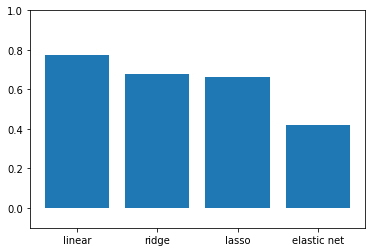

In [73]:
plt.ylim(-0.1, 1)
plt.xticks(range(4), ['linear', 'ridge', 'lasso', 'elastic net'])
plt.bar(range(4), scores['r2'])

Usando la gráfica, podemos concluir que para la métrica de calidad MAE, el modelo de regresión que menor error obtiene es el Linear. 

<BarContainer object of 4 artists>

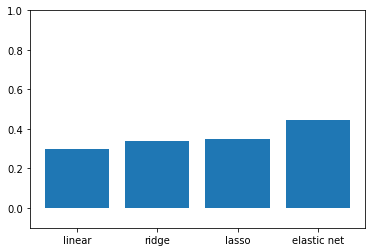

In [74]:
plt.ylim(-0.1, 1)
plt.xticks(range(4), ['linear', 'ridge', 'lasso', 'elastic net'])
plt.bar(range(4), list(map(lambda x: -x, scores['mae'])))

Usando la gráfica, podemos concluir que para la métrica de calidad RMSE, el modelo de regresión que menor error obtiene es el Linear. 

<BarContainer object of 4 artists>

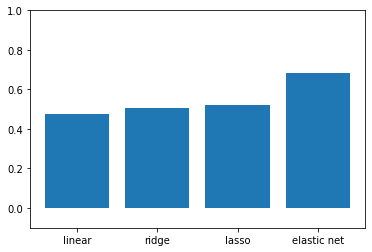

In [75]:
plt.ylim(-0.1, 1)
plt.xticks(range(4), ['linear', 'ridge', 'lasso', 'elastic net'])
plt.bar(range(4), list(map(lambda x: -x, scores['rmse'])))

Como conclusión final podemos establecer el siguiente ranking:

1. Linear Regression: Ya que para cada una de las métricas de calidad ha sido el que ha obtenido mejor resultado.
2. Ridge
3. Lasso
Ridge y Lasso han estado bastante parejos en cuanto a los resultados obtenidos.
4. ElasticNet: Es el que peor ha funcionado.

Esta gráfica nos funcionaba cuando aplicamos la transformación con el logaritmo al precio, pero es algo que finalmente no usamos.
Su finalidad fue comparar el precio real con el predecido.

In [76]:
#import matplotlib.pyplot as plt
#plt.xlabel('True price')
#plt.ylabel('Predictd price')
#plt.scatter(np.exp(y),
#            np.exp(model.predict(X)))
#plt.plot(np.linspace(0, 100000,100000), color='red')

Nos hubiera gustado utilizar la librería qgrid para representar algunas cosas pero no hemos conseguido descargarla:

In [77]:
#import qgrid
#qgrid_widget = qgrid.show_grid(resuts)
#qgrid_widget

In [78]:
#!pip install matplotlib-venn qgrid

In [79]:
#!apt-get -qq install -y libfluidsynth1 qgrid

# **Cosas descartadas que también hemos probado:**

## Graficas mal hechas

In [ ]:
q print(y_predecido)

NameError: ignored

In [ ]:
model.predict

<bound method LinearModel.predict of ElasticNet(alpha=0.1, copy_X=True, fit_intercept=True, l1_ratio=0.001,
           max_iter=1000, normalize=False, positive=False, precompute=False,
           random_state=None, selection='cyclic', tol=0.0001, warm_start=False)>

In [ ]:
y_predecido = abs(column_transformer.transformers_[2][1].inverse_transform(model.predict(X)))

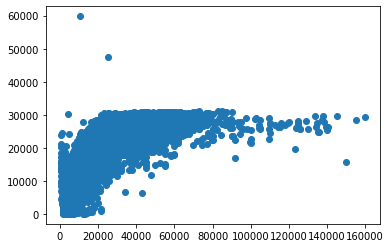

In [ ]:
plt.scatter(column_transformer.transformers_[2][1].inverse_transform(y), y_predecido)

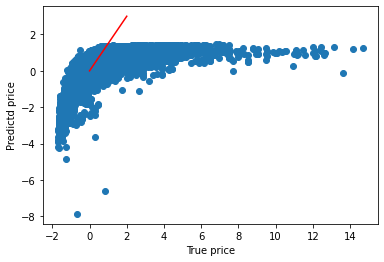

In [ ]:
import matplotlib.pyplot as plt
plt.xlabel('True price')
plt.ylabel('Predictd price')
plt.scatter(y,
            model.predict(X))
plt.plot(np.linspace(0, 3,3), color='red')

(array([3.0950e+03, 3.0924e+04, 2.8838e+04, 2.0917e+04, 1.1699e+04,
        6.3530e+03, 2.9310e+03, 1.3510e+03, 9.1500e+02, 5.8900e+02,
        3.8000e+02, 1.9900e+02, 1.3000e+02, 7.9000e+01, 4.7000e+01,
        1.2000e+01, 1.9000e+01, 9.0000e+00, 6.0000e+00, 7.0000e+00,
        6.0000e+00, 4.0000e+00, 3.0000e+00, 9.0000e+00, 2.0000e+00,
        8.0000e+00, 4.0000e+00, 1.0000e+00, 1.0000e+00, 2.0000e+00]),
 array([-1.68509124, -1.13997244, -0.59485363, -0.04973483,  0.49538397,
         1.04050278,  1.58562158,  2.13074038,  2.67585919,  3.22097799,
         3.7660968 ,  4.3112156 ,  4.8563344 ,  5.40145321,  5.94657201,
         6.49169082,  7.03680962,  7.58192842,  8.12704723,  8.67216603,
         9.21728484,  9.76240364, 10.30752244, 10.85264125, 11.39776005,
        11.94287885, 12.48799766, 13.03311646, 13.57823527, 14.12335407,
        14.66847287]),
 <a list of 30 Patch objects>)

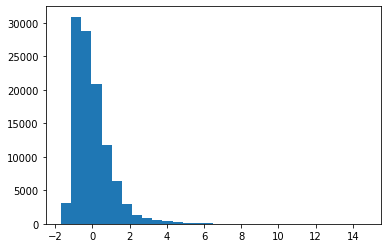

In [ ]:
plt.hist(y, bins=30)

(array([2.8800e+02, 8.8800e+02, 1.9190e+03, 7.1270e+03, 1.0258e+04,
        1.3539e+04, 1.0162e+04, 9.9210e+03, 8.7550e+03, 8.5820e+03,
        6.6290e+03, 5.7060e+03, 4.4510e+03, 3.6570e+03, 3.5910e+03,
        2.1220e+03, 2.5090e+03, 1.7220e+03, 1.3750e+03, 8.2200e+02,
        7.3400e+02, 5.1700e+02, 4.5100e+02, 3.8300e+02, 2.7800e+02,
        3.3600e+02, 3.0100e+02, 3.2000e+02, 9.2000e+01, 1.7700e+02,
        1.7600e+02, 1.3600e+02, 6.8000e+01, 1.0400e+02, 5.2000e+01,
        4.3000e+01, 4.6000e+01, 4.8000e+01, 3.6000e+01, 4.0000e+01,
        2.5000e+01, 1.4000e+01, 1.3000e+01, 1.8000e+01, 1.6000e+01,
        3.0000e+00, 3.0000e+00, 6.0000e+00, 5.0000e+00, 5.0000e+00,
        9.0000e+00, 3.0000e+00, 2.0000e+00, 4.0000e+00, 2.0000e+00,
        0.0000e+00, 4.0000e+00, 2.0000e+00, 5.0000e+00, 0.0000e+00,
        0.0000e+00, 6.0000e+00, 0.0000e+00, 1.0000e+00, 2.0000e+00,
        1.0000e+00, 1.0000e+00, 2.0000e+00, 0.0000e+00, 3.0000e+00,
        6.0000e+00, 0.0000e+00, 1.0000e+00, 1.00

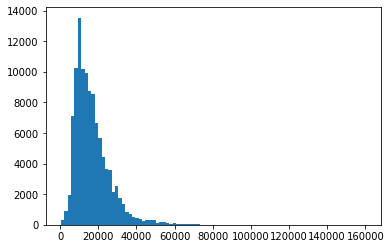

In [ ]:
plt.hist(column_transformer.transformers_[2][1].inverse_transform(y), bins=90)

(array([1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 2.000e+00,
        0.000e+00, 0.000e+00, 2.000e+00, 1.000e+00, 4.000e+00, 4.000e+00,
        8.000e+00, 9.000e+00, 1.300e+01, 1.100e+01, 2.200e+01, 2.500e+01,
        3.500e+01, 3.700e+01, 5.600e+01, 6.800e+01, 9.300e+01, 9.200e+01,
        1.330e+02, 1.290e+02, 1.460e+02, 1.410e+02, 1.840e+02, 2.080e+02,
        2.480e+02, 3.670e+02, 5.800e+02, 7.280e+02, 9.550e+02, 1.416e+03,
        1.860e+03, 2.531e+03, 3.308e+03, 4.373e+03, 5.778e+03, 6.503e+03,
        7.221e+03, 7.432e+03, 6.854e+03, 6.979e+03, 5.590e+03, 4.945e+03,
        4.105e+03, 4.590e+03, 3.713e+0

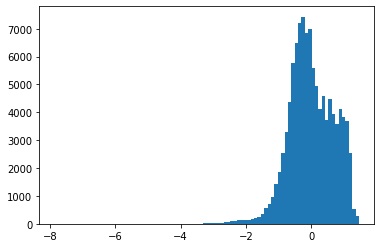

In [ ]:
plt.hist(model.predict(X), bins=90)

(array([1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 2.000e+00,
        0.000e+00, 0.000e+00, 2.000e+00, 1.000e+00, 4.000e+00, 4.000e+00,
        8.000e+00, 9.000e+00, 1.300e+01, 1.100e+01, 2.200e+01, 2.500e+01,
        3.500e+01, 3.700e+01, 5.600e+01, 6.800e+01, 9.300e+01, 9.200e+01,
        1.330e+02, 1.290e+02, 1.460e+02, 1.410e+02, 1.840e+02, 2.080e+02,
        2.480e+02, 3.670e+02, 5.800e+02, 7.280e+02, 9.550e+02, 1.416e+03,
        1.860e+03, 2.531e+03, 3.308e+03, 4.373e+03, 5.778e+03, 6.503e+03,
        7.221e+03, 7.432e+03, 6.854e+03, 6.979e+03, 5.590e+03, 4.945e+03,
        4.105e+03, 4.590e+03, 3.713e+0

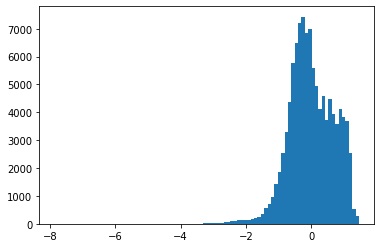

In [ ]:
plt.hist(model.predict(X), bins=90)

(array([1.1186e+04, 9.6190e+03, 1.0312e+04, 9.3390e+03, 1.0012e+04,
        8.3140e+03, 8.5770e+03, 7.1820e+03, 6.3560e+03, 5.0450e+03,
        5.6830e+03, 4.5040e+03, 4.0250e+03, 3.8960e+03, 1.0580e+03,
        1.1170e+03, 4.5000e+02, 2.6700e+02, 2.1000e+02, 1.6500e+02,
        1.5500e+02, 1.2700e+02, 1.1900e+02, 1.1600e+02, 1.1300e+02,
        1.1100e+02, 7.7000e+01, 7.6000e+01, 7.5000e+01, 4.7000e+01,
        4.2000e+01, 3.1000e+01, 2.5000e+01, 2.7000e+01, 1.6000e+01,
        1.6000e+01, 7.0000e+00, 1.0000e+01, 8.0000e+00, 7.0000e+00,
        5.0000e+00, 4.0000e+00, 0.0000e+00, 2.0000e+00, 1.0000e+00,
        0.0000e+00, 0.0000e+00, 1.0000e+00, 2.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.00

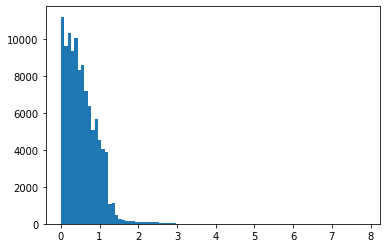

In [ ]:
plt.hist(abs(model.predict(X)), bins=90)

(array([1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 2.000e+00,
        0.000e+00, 0.000e+00, 2.000e+00, 1.000e+00, 4.000e+00, 4.000e+00,
        8.000e+00, 9.000e+00, 1.300e+01, 1.100e+01, 2.200e+01, 2.500e+01,
        3.500e+01, 3.700e+01, 5.600e+01, 6.800e+01, 9.300e+01, 9.200e+01,
        1.330e+02, 1.290e+02, 1.460e+02, 1.410e+02, 1.840e+02, 2.080e+02,
        2.480e+02, 3.670e+02, 5.800e+02, 7.280e+02, 9.550e+02, 1.416e+03,
        1.860e+03, 2.531e+03, 3.308e+03, 4.373e+03, 5.778e+03, 6.503e+03,
        7.221e+03, 7.432e+03, 6.854e+03, 6.979e+03, 5.590e+03, 4.945e+03,
        4.105e+03, 4.590e+03, 3.713e+0

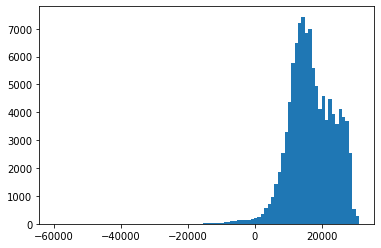

In [ ]:
plt.hist(column_transformer.transformers_[2][1].inverse_transform(model.predict(X)), bins=90)

(array([2.550e+02, 2.660e+02, 2.830e+02, 3.240e+02, 4.350e+02, 4.990e+02,
        5.420e+02, 6.730e+02, 7.150e+02, 9.930e+02, 1.150e+03, 1.337e+03,
        1.627e+03, 1.983e+03, 2.342e+03, 2.754e+03, 3.474e+03, 3.899e+03,
        4.147e+03, 4.760e+03, 4.704e+03, 4.658e+03, 5.021e+03, 4.445e+03,
        4.557e+03, 4.573e+03, 3.443e+03, 3.171e+03, 3.112e+03, 2.587e+03,
        2.962e+03, 2.996e+03, 2.351e+03, 2.799e+03, 2.916e+03, 2.551e+03,
        2.667e+03, 2.106e+03, 2.558e+03, 3.296e+03, 1.799e+03, 2.420e+03,
        2.754e+03, 8.380e+02, 3.320e+02, 4.040e+02, 6.000e+01, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+0

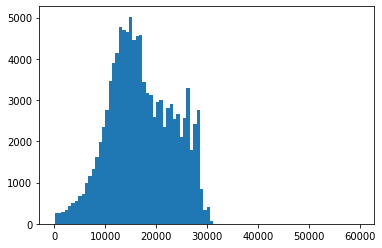

In [ ]:
plt.hist(abs(column_transformer.transformers_[2][1].inverse_transform(model.predict(X))), bins=90)

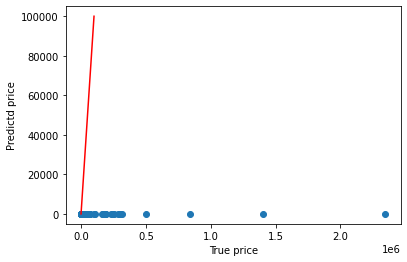

In [ ]:
import matplotlib.pyplot as plt
plt.xlabel('True price')
plt.ylabel('Predictd price')
plt.scatter(np.exp(y),
            np.exp(model.predict(X)))
plt.plot(np.linspace(0, 100000,100000), color='red')


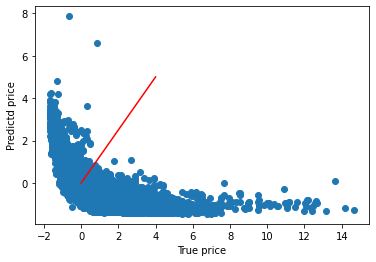

In [ ]:
import matplotlib.pyplot as plt
plt.xlabel('True price')
plt.ylabel('Predictd price')
plt.scatter(y,
            model.predict(X)*-1)
plt.plot(np.linspace(0, 5,5), color='red')

In [ ]:
model.predict(X)

array([-0.01288627,  0.41874334, -0.27782107, ..., -1.88575483,
       -2.45661997, -2.23452616])

In [ ]:
column_transformer.transformers_[2][1].inverse_transform(model.predict(X))

array([16764.40275612, 20975.47694304, 14179.64000789, ...,
       -1507.71850866, -7077.20541502, -4910.40894074])

In [ ]:
column_transformer.transformers_[2][1].inverse_transform(y)

array([12500., 16500., 11000., ...,  1590.,  1250.,  2295.])

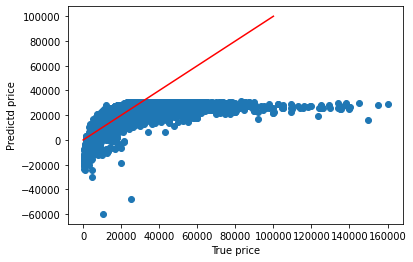

In [ ]:
import matplotlib.pyplot as plt
plt.xlabel('True price')
plt.ylabel('Predictd price')
plt.scatter(column_transformer.transformers_[2][1].inverse_transform(y),
            column_transformer.transformers_[2][1].inverse_transform(model.predict(X)))
plt.plot(np.linspace(0, 100000,100000), color='red')

#column_transformer.transformers_[2][1].inverse_transform(model.predict(X))

## Mas intentos fallidos

In [ ]:
from sklearn import linear_model
import seaborn as sns

#columns=['year','mileage','engineSize'] # Cómo sabemos cuáles hay que pasarle para hacer el entrenamiento correctamente? como me fijo bien en las gráficas?
columns=['year', 'transmission1','transmission2','transmission3','transmission4','mileage','fuelType1','fuelType2',
                                 'fuelType3','fuelType4', 'fuelType5','engineSize','maker1','maker2','maker3','maker4','maker5','maker6','maker7',
                                  'maker8','maker9','maker10','maker11']
lm_global = LinearRegression()
lm_global.fit() # Son nuestras variables X e y

print('Coeficientes del modelo: intercept=%s slope=%s' % (lm_global.intercept_, lm_global.coef_)) 

# Antes de hacer la predicción, ajustar los hiperparámetros para poder reducir nuestro error de predicción del precio.

lm_global.predict(np.array([2016, 1,0,0,0,36203,1,0,0,0,0,2.0,1,0,0,0,0,0,0,0,0,0,0]).reshape(1, -1)) # se supone que me tendría que salir 16.500 
# Qué falla?? => Mi modelo no ha aprendido bien.
# Entender para que sirve reshape





# Vamos a utilizar la librería gráfica *Seaborn* para representar un ajuste de regresión lineal para cada una de las variables de entrada continua

# sns.regplot(definitivo['year'], definitivo['price']) # NO FUNCIONA

#lm_global.predict(np.array([2016, 36203, 2.0]).reshape(1, -1)) # Hemos intentado esto también
 

TypeError: ignored

In [ ]:
# Vamos a utilizar la librería gráfica *Seaborn* para representar un ajuste de regresión lineal para cada una de las variables de entrada continuas que tenemos:
import seaborn as sns

# sns.regplot(definitivo['mileage'], definitivo['price']) 

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

print("Modelo lm_global:")
print("MAE: ", mean_absolute_error(definitivo['price'], lm_global.predict(definitivo[columns])))
print("MSE: ", mean_squared_error(definitivo['price'], lm_global.predict(definitivo[columns])))
print("RMSE: ", mean_squared_error(definitivo['price'], lm_global.predict(definitivo[columns]), squared=False)) 

Modelo lm_global:


NotFittedError: ignored

In [ ]:
# definitivo.price.inverse_transform([definitivo[columns], copy])
# yTrue = column_transformer.transformers[2][1].inverse_transform(definitivo.price)


In [ ]:
# Saco todas las posibles combinaciones que tenemos:

variables = definitivo[columns]

# La función combinations calcula todas las combinaciones posibles de elementos en un iterable
from itertools import combinations

combinaciones = map(lambda r: combinations(variables, r), range(1, len(variables) + 1))

# Aplana una lista de listas para convertirla en una lista 'a secas'
flatten = lambda l: [item for sublist in l for item in sublist]

combinaciones = flatten(combinaciones)

# Sacamos por pantalla todas las posibles combinaciones
#for c in combinaciones:
#    print(c)

In [ ]:
# ENTENDER PARA QUE SIRVE


# Evaluación justa del modelo:

# Para realizar una evaluación más justa de cualquier modelo de *Machine Learning* se utiliza la división del conjunto de datos en dos conjuntos: 
# uno para entrenamiento y otro para test.

#Evaluación de las combinaciones de variables para el conjunto de datos del precio de los coches, aunque utilizando la división de los datos en entrenamiento y test:

from sklearn.model_selection import train_test_split

r2 = []
mae = []
mse = []
rmse = []

# Partición en entrenamiento/test con un 30% de las muestras al conjunto de test
# Se fija la semilla del generador de números aleatorios para tener resultados consistentes en el notebook
X_train, X_test, Y_train, Y_test = train_test_split(definitivo[columns], definitivo.price, test_size=0.3, random_state=1337)

for c in combinaciones:
    m = LinearRegression()
    
    # Si solo hay una variable, hay que ponerlo en forma de matriz n x 1
    if len(c)<2:
        xs = np.array(X_train.loc[:,c]).reshape(-1, 1)
        xs_test = np.array(X_test.loc[:,c]).reshape(-1, 1)
    else:
        xs = X_train.loc[:,c]
        xs_test = X_test.loc[:,c]
    m.fit(xs, Y_train)
    r2.append(m.score(xs_test, Y_test))
    mae.append(mean_absolute_error(Y_test, m.predict(xs_test)))
    mse.append(mean_squared_error(Y_test, m.predict(xs_test)))
    rmse.append(mean_squared_error(Y_test, m.predict(xs_test), squared=False))

resultados = pd.DataFrame({
    'Combinación': combinaciones,
    'R2': r2,
    'MAE': mae,
    'MSE': mse,
    'RMSE': rmse
})
qgrid_widget = qgrid.show_grid(resultados)
qgrid_widget

NameError: ignored

Validación cruzada con 5 folds de cada uno de los modelos entrenados,
utilizando las siguientes métricas de calidad: RMSE, MAE y R^2 .

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score


modelo = LinearRegression()

# Hago la validación cruzada para el RMSE

scores = cross_val_score(modelo, definitivo[columns], definitivo.price , cv=5, scoring='neg_mean_squared_error')
print(scores)

# Hago la validación cruzada para el MAE

scores = cross_val_score(modelo, definitivo[columns], definitivo.price, cv=5, scoring='neg_median_absolute_error')
print(scores)
# Hago la validación cruzada para el R^2
scores = cross_val_score(modelo, definitivo[columns], definitivo.price, cv=5, scoring = 'r2')
print(scores)
#--------------------------------------------------------------------------
# Mido la calidad del modelo con R^2

lm_global.score(definitivo[columns], definitivo.price)  
#-------------------------------------------------------------------------





# Hay que interpretar los resultados obtenidos, comparar los modelos, ver que diferencias hay entre cada uno de ellos, y 
# ver que modelo elegeríamos al final en función de los resultados

[-5.55946714e-01 -1.18648287e-01 -3.88298773e-01 -2.22298863e-01
 -5.87963730e+22]
[-3.09139703e-01 -1.91838786e-01 -2.57634333e-01 -3.17243624e-01
 -2.90187399e+11]
[ 6.02201475e-01  7.65419674e-01  7.24955295e-01  5.19745625e-01
 -1.09266971e+23]


NotFittedError: ignored

In [ ]:
yPred = lm_global.predict(definitivo[columns])

yPred.mean()

NotFittedError: ignored

In [ ]:
sorted(sklearn.metrics.SCORERS.keys())

['accuracy',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'average_precision',
 'balanced_accuracy',
 'completeness_score',
 'explained_variance',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'fowlkes_mallows_score',
 'homogeneity_score',
 'jaccard',
 'jaccard_macro',
 'jaccard_micro',
 'jaccard_samples',
 'jaccard_weighted',
 'max_error',
 'mutual_info_score',
 'neg_brier_score',
 'neg_log_loss',
 'neg_mean_absolute_error',
 'neg_mean_gamma_deviance',
 'neg_mean_poisson_deviance',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_median_absolute_error',
 'neg_root_mean_squared_error',
 'normalized_mutual_info_score',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'r2',
 'recall',
 'recall_macro',
 'recall_micro',
 'recall_samples',
 'recall_weighted',
 'roc_auc',
 'roc_auc_ovo',
 'roc_auc_ovo_weighted',
 'roc_auc_ovr',
 'roc_auc_ovr_weighted',
 'v_measure_score']

In [ ]:
definitivo[columns]

,year,transmission1,transmission2,transmission3,transmission4,mileage,fuelType1,fuelType2,fuelType3,fuelType4,fuelType5,engineSize,maker1,maker2,maker3,maker4,maker5,maker6,maker7,maker8,maker9,maker10,maker11
0,47.0,0.0,1.0,0.0,0.0,-0.344296,0.0,0.0,0.0,0.0,1.0,0.212121,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,46.0,1.0,0.0,0.0,0.0,0.622255,1.0,0.0,0.0,0.0,0.0,0.303030,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,46.0,0.0,1.0,0.0,0.0,0.326783,0.0,0.0,0.0,0.0,1.0,0.212121,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,47.0,1.0,0.0,0.0,0.0,0.138177,1.0,0.0,0.0,0.0,0.0,0.303030,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,49.0,0.0,1.0,0.0,0.0,-0.992992,0.0,0.0,0.0,0.0,1.0,0.151515,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
108535,42.0,0.0,1.0,0.0,0.0,2.407125,1.0,0.0,0.0,0.0,0.0,0.303030,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
108536,38.0,0.0,1.0,0.0,0.0,3.073058,0.0,0.0,0.0,0.0,1.0,0.181818,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
108537,39.0,0.0,1.0,0.0,0.0,2.218235,0.0,0.0,0.0,0.0,1.0,0.212121,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
108538,36.0,0.0,1.0,0.0,0.0,2.818150,0.0,0.0,0.0,0.0,1.0,0.181818,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


## RIDGE


In [ ]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
# Demo de Ridge regression
X_train = definitivo[columns]
Y_train = definitivo.price

rid = Ridge(alpha=0)
rid.fit(X_train, Y_train)

mean_squared_error(Y_test, rid.predict(X_test), squared=False)

from sklearn.model_selection import train_test_split

r2 = []
mae = []
mse = []
rmse = []

# Partición en entrenamiento/test con un 30% de las muestras al conjunto de test
# Se fija la semilla del generador de números aleatorios para tener resultados consistentes en el notebook
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=7777)

for c in combinaciones:
    m = LinearRegression()
    
    # Si solo hay una variable, hay que ponerlo en forma de matriz n x 1
    if len(c)<2:
        xs = np.array(X_train.loc[:,c]).reshape(-1, 1)
        xs_test = np.array(X_test.loc[:,c]).reshape(-1, 1)
    else:
        xs = X_train.loc[:,c]
        xs_test = X_test.loc[:,c]
    m.fit(xs, Y_train)
    r2.append(m.score(xs_test, Y_test))
    mae.append(mean_absolute_error(Y_test, m.predict(xs_test)))
    mse.append(mean_squared_error(Y_test, m.predict(xs_test)))
    rmse.append(mean_squared_error(Y_test, m.predict(xs_test), squared=False))

resultados = pd.DataFrame({
    'Combinación': combinaciones,
    'R2': r2,
    'MAE': mae,
    'MSE': mse,
    'RMSE': rmse
})
qgrid_widget = qgrid.show_grid(resultados)
qgrid_widget

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=1.29707e-17): result may not be accurate.
  overwrite_a=True).T


NameError: ignored

## Cargar datos dividir test y train

In [ ]:
from sklearn.model_selection import train_test_split

r2 = []
mae = []
mse = []
rmse = []

# Partición en entrenamiento/test con un 30% de las muestras al conjunto de test
# Se fija la semilla del generador de números aleatorios para tener resultados consistentes en el notebook
X_train, X_test, Y_train, Y_test = train_test_split(definitivo[columns], definitivo.price, test_size=0.3, random_state=7777)

for c in combinaciones:
    m = LinearRegression()
    
    # Si solo hay una variable, hay que ponerlo en forma de matriz n x 1
    if len(c)<2:
        xs = np.array(X_train.loc[:,c]).reshape(-1, 1)
        xs_test = np.array(X_test.loc[:,c]).reshape(-1, 1)
    else:
        xs = X_train.loc[:,c]
        xs_test = X_test.loc[:,c]
    m.fit(xs, Y_train)
    r2.append(m.score(xs_test, Y_test))
    mae.append(mean_absolute_error(Y_test, m.predict(xs_test)))
    mse.append(mean_squared_error(Y_test, m.predict(xs_test)))
    rmse.append(mean_squared_error(Y_test, m.predict(xs_test), squared=False))


NameError: ignored

In [ ]:
resultados = pd.DataFrame({
    'Combinación': combinaciones,
    'R2': r2,
    'MAE': mae,
    'MSE': mse,
    'RMSE': rmse
})

NameError: ignored

In [ ]:
resultados

NameError: ignored

In [ ]:
import qgrid
qgrid_widget = qgrid.show_grid(resultados)
qgrid_widget

ModuleNotFoundError: ignored

In [ ]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
# Demo de Ridge regression

rid = Ridge(alpha=0)
rid.fit(X_train, Y_train)

mean_squared_error(Y_test, rid.predict(X_test), squared=False)
################################################################# RIDGE

NameError: ignored

In [ ]:
from matplotlib import pyplot as plt
alpha = np.arange(0.0, 1.1, step=0.2)
rmse = []
for a in alpha:
    rid = Ridge(alpha=a)
    rid.fit(X_train, Y_train)
    rmse.append(mean_squared_error(Y_test, rid.predict(X_test), squared=False))
plt.plot(alpha, rmse)

NameError: ignored